In [8]:
import math as m

def raiznsima(a, n, niter, tol):
    x = a
    for i in range(niter): 
        xk = x*(1-1/n)+a/(n*x**(n-1))
        # print("{} -> {}".format(i,xk))
        if abs(x-xk)<tol: 
            return(xk)
        x = xk
    print('Realizadas {} iteraciones sin convergencia ({})'.format(niter,tol))
    return(xk)

raiznsima(5, 3, 124, 1e-05)

1.7099759466766973

In [9]:
def euclides(D,d):
    r = 1
    while r!= 0:
        c,r = divmod(D,d)
        D, d = (d, r)
    return D

euclides(4568, 3456)

8

f1 = [ 1.         -2.          2.5        -2.          1.375      -0.65
  0.3625     -0.07142857  0.09129464  0.03705357  0.05332589  0.04888799
  0.04999746  0.04974143  0.04979629  0.04978532  0.04978738  0.04978702
  0.04978708  0.04978707]

f2 = [1.         0.25       0.11764706 0.07692308 0.0610687  0.05434783
 0.0515132  0.0503869  0.04997713 0.04984202 0.04980163 0.04979062
 0.04978787 0.04978724 0.0497871  0.04978707 0.04978707 0.04978707
 0.04978707 0.04978707]

Valor exacto e^-3 = 0.049787068367863944


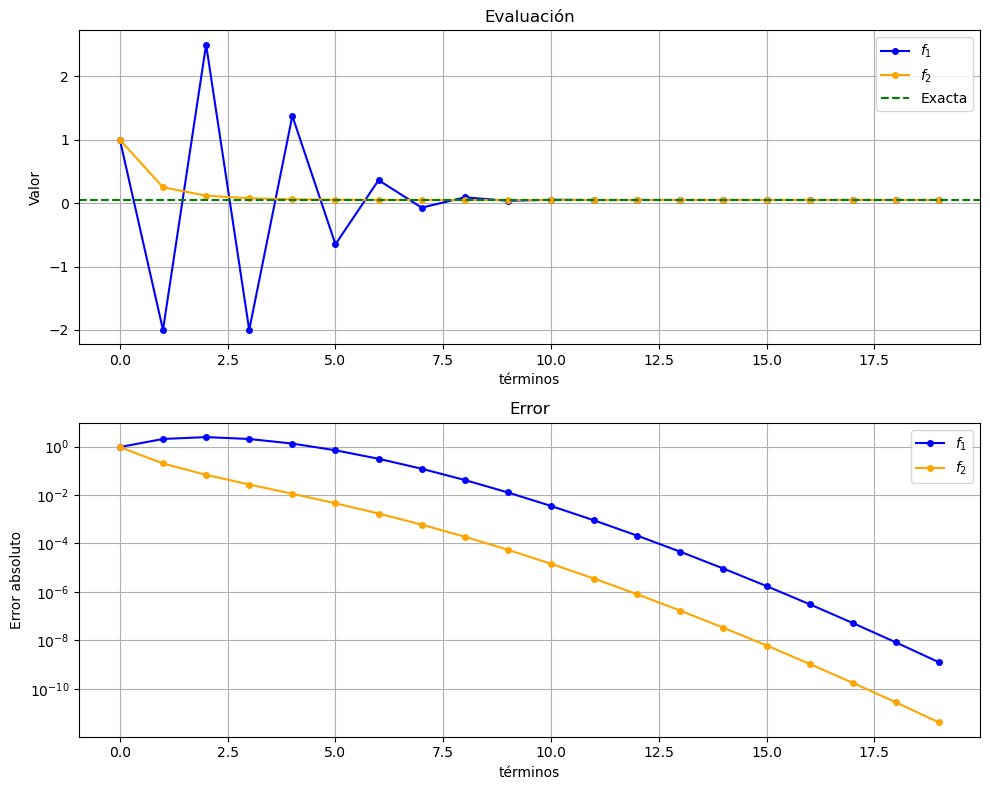

In [4]:
import numpy as np
from math import factorial
import matplotlib.pyplot as plt

def exponencial(x, n):
    """
    Evalúa e^x usando dos métodos de series de Taylor:
    f1: suma directa de x^k/k!
    f2: inverso de la suma de (-x)^k/k!
    
    Parámetros:
    x: valor donde evaluar
    n: número de términos
    
    Retorna:
    f1, f2: arrays con las aproximaciones para cada número de términos
    """
    f1 = np.zeros(n)
    f2 = np.zeros(n)
    
    suma1 = 0
    suma2 = 0
    
    for k in range(n):
        suma1 += x**k / factorial(k)
        suma2 += (-x)**k / factorial(k)
        f1[k] = suma1
        f2[k] = 1 / suma2
    
    return f1, f2


# Ejemplo de uso con los datos proporcionados
x = -3
n = 20

f1, f2 = exponencial(x, n)
exacta = np.exp(x)

print("f1 =", f1)
print("\nf2 =", f2)
print(f"\nValor exacto e^{x} = {exacta}")

# Visualización
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(10, 8))

terminos = np.arange(n)

# Gráfica de evaluación
ax1.plot(terminos, f1, 'b-o', label='$f_1$', markersize=4)
ax1.plot(terminos, f2, 'orange', marker='o', label='$f_2$', markersize=4)
ax1.axhline(y=exacta, color='green', linestyle='--', label='Exacta')
ax1.set_xlabel('términos')
ax1.set_ylabel('Valor')
ax1.set_title('Evaluación')
ax1.legend()
ax1.grid(True)

# Gráfica de error (escala logarítmica)
error1 = np.abs(f1 - exacta)
error2 = np.abs(f2 - exacta)

ax2.semilogy(terminos, error1, 'b-o', label='$f_1$', markersize=4)
ax2.semilogy(terminos, error2, 'orange', marker='o', label='$f_2$', markersize=4)
ax2.set_xlabel('términos')
ax2.set_ylabel('Error absoluto')
ax2.set_title('Error')
ax2.legend()
ax2.grid(True)

plt.tight_layout()
plt.show()


In [5]:
exponencial(-3, 20)

(array([ 1.        , -2.        ,  2.5       , -2.        ,  1.375     ,
        -0.65      ,  0.3625    , -0.07142857,  0.09129464,  0.03705357,
         0.05332589,  0.04888799,  0.04999746,  0.04974143,  0.04979629,
         0.04978532,  0.04978738,  0.04978702,  0.04978708,  0.04978707]),
 array([1.        , 0.25      , 0.11764706, 0.07692308, 0.0610687 ,
        0.05434783, 0.0515132 , 0.0503869 , 0.04997713, 0.04984202,
        0.04980163, 0.04979062, 0.04978787, 0.04978724, 0.0497871 ,
        0.04978707, 0.04978707, 0.04978707, 0.04978707, 0.04978707]))

In [12]:
from numpy.polynomial import Polynomial

def base_lagrange(x):
    """
    Construye la base de polinomios de Lagrange {L_k} para el soporte x.

    Parámetros
    ----------
    x : list | tuple | numpy.ndarray
        Soporte de nodos de interpolación.

    Devuelve
    --------
    list[Polynomial]
        Lista [L0, L1, ..., Ln-1] de polinomios de Lagrange como
        numpy.polynomial.Polynomial (coeficientes en orden ascendente).

    Algoritmo
    ---------
    1) Normalización de entrada: tuple -> list, ndarray -> list, list -> ok; sino -> ValueError.
    2) Para cada x_k:
       a) copiar soporte
       b) eliminar x_k
       c) P = Polynomial.fromroots(soporte_sin_k)  (P tiene ceros en los otros nodos)
       d) L_k = P / P(x_k)
       e) añadir L_k a la lista
    """
    # --- 1. Comprobación / normalización de la entrada ---
    if isinstance(x, tuple):
        x = list(x)
    elif isinstance(x, np.ndarray):
        x = x.tolist()
    elif isinstance(x, list):
        pass
    else:
        raise ValueError("x debe ser list, tuple o numpy.ndarray")

    # Validaciones básicas
    if len(x) == 0:
        raise ValueError("El soporte x no puede estar vacío.")
    if len(set(x)) != len(x):
        raise ValueError("El soporte x contiene nodos repetidos (no permitido).") # set(x) elimina duplicados automaticamente

     # --- 2. Construcción de la base de Lagrange ---
    L = []
    for k, xk in enumerate(x):
        soporte_sin_k = x.copy() # copia de la lista para no modificar la original
        soporte_sin_k.pop(k) # pop elimina el elemento en la posicion k
        # soporte_sin_k contiene todos los nodos excepto xk

        # Polinomio con ceros en todos los nodos excepto xk
        P = Polynomial.fromroots(soporte_sin_k)
        # Polynomial.fromroots([0, 2]) representa el polinomio P(x)=(x-0)(x-2)=x^2-2 y devuelve Polynomial([0, -2, 1])

        # Normalizamos para que L(xk) = 1
        denom = P(xk)

        # Para asegurarnos de que no dividimos por 0
        if np.isclose(denom, 0.0): # np.isclose(a, b) compara si dos números son “prácticamente iguales” dentro de una tolerancia
                raise ZeroDivisionError("Denominador ~0 al evaluar P(xk); revisa nodos muy cercanos o repetidos.")

        Lk = P / denom
        L.append(Lk)
    return L

base_lagrange([-4.2, -1.7, -1.5, -0.4,  1.1])


[Polynomial([-0.00825334, -0.02348744, -0.00095627,  0.01838979,  0.00735592], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([ 1.52307692,  3.8010989 , -1.02747253, -2.74725275, -0.54945055], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([-2.03418803, -4.91711992,  1.66407666,  3.36700337,  0.64750065], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([ 1.44534413,  0.84394553, -0.96307202, -0.7729113 , -0.12268433], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 Polynomial([0.07402032, 0.29556293, 0.32742415, 0.13477089, 0.01727832], domain=[-1.,  1.], window=[-1.,  1.], symbol='x')]

In [17]:
import numpy as np
from numpy.polynomial import polynomial as P

def itp_Tchebishev(fun, npts, a, b):
    """
    Interpolación polinómica usando nodos de Chebyshev.
    
    Parámetros:
    fun: función a interpolar
    npts: número de puntos (nodos de Chebyshev)
    a, b: extremos del intervalo [a, b]
    
    Retorna:
    pol: función que evalúa el polinomio interpolante
    """
    # Calcular nodos de Chebyshev en [-1, 1]
    k = np.arange(npts)
    nodos_std = np.cos((2*k + 1) * np.pi / (2 * npts))
    
    # Transformar al intervalo [a, b]
    nodos = (a + b) / 2 + (b - a) / 2 * nodos_std
    
    # Evaluar la función en los nodos
    y = fun(nodos)
    
    # Construir el polinomio interpolante usando interpolación de Lagrange
    def pol(x):
        """Evaluación usando la fórmula baricéntrica de Lagrange"""
        x = np.atleast_1d(x)
        resultado = np.zeros_like(x, dtype=float)
        
        for i, xi in enumerate(x):
            # Verificar si xi coincide con algún nodo
            coincide = np.isclose(xi, nodos)
            if np.any(coincide):
                resultado[i] = y[np.argmax(coincide)]
            else:
                # Fórmula de Lagrange
                L = np.ones(npts)
                for j in range(npts):
                    for m in range(npts):
                        if m != j:
                            L[j] *= (xi - nodos[m]) / (nodos[j] - nodos[m])
                resultado[i] = np.sum(L * y)
        
        return resultado[0] if resultado.size == 1 else resultado
    
    return pol


# Verificación con los datos proporcionados
funtest = lambda x: 1/(1+x*x)
npts = 5
a, b = -3, 3

pol = itp_Tchebishev(funtest, npts, a, b)
x_eval = 0.89
resultado = pol(x_eval)

print(f"Evaluación en x = {x_eval}: {resultado}")
print(f"Solución esperada: 0.7583812954409318")

Evaluación en x = 0.89: 0.7583812954409318
Solución esperada: 0.7583812954409318


In [19]:
itp_Tchebishev(lambda x: 1/(1+x*x), 5, -3, 3)(0.89)

np.float64(0.7583812954409318)

In [20]:
def chebyshev_nodos(n, a=-1.0, b=1.0): # por defecto valores de a y b en (-1,1) 
    """
    Calcula los n nodos de Tchebyshev de 1ª especie (raíces de T_n)
    mapeados al intervalo [a,b].

    Fórmulas:
        t_k = cos((2k-1)π / (2n)),   k = 1..n   → raíces en [-1,1]
        x_k = (a+b)/2 + (b-a)/2 * t_k  → transformación lineal a [a,b]
    """
    # Índices de los nodos (1, 2, ..., n)
    k = np.arange(1, n+1, dtype=float)

    # Raíces de T_n(x) en [-1,1]
    t = np.cos((2*k - 1) * np.pi / (2*n))

    # Transformación lineal para pasar de [-1,1] a [a,b]
    xm = 0.5*(a+b)   
    xr = 0.5*(b-a)   

    # Nodos de Tchebyshev en [a,b]
    return xm + xr*t

def itp_Tchebishev(fun, npts, a, b):
    """
    Construye el polinomio interpolante de Lagrange usando nodos de Chebyshev.
    
    Parámetros
    ----------
    fun : callable
        Función a interpolar (debe ser vectorizable con numpy).
    npts : int
        Número de puntos de interpolación.
    a, b : float
        Límites del intervalo [a,b].
    
    Devuelve
    --------
    Polynomial
        Polinomio interpolante como numpy.polynomial.Polynomial.
    """
    # --- 1. Calcular y ordenar nodos de Chebyshev ---
    x = chebyshev_nodos(npts, a, b)
    x = np.sort(x)  # Ordenar de menor a mayor
    
    # --- 2. Evaluar la función en los nodos ---
    y = fun(x)
    
    # --- 3. Obtener la base de Lagrange ---
    # Convertir a lista porque base_lagrange espera list/tuple/ndarray
    # y la normalización interna funciona mejor con lista explícita
    L = base_lagrange(x.tolist())  # ← CAMBIO IMPORTANTE
    
    # --- 4. Construir el interpolante: p(x) = Σ y_k * L_k(x) ---
    # Inicializar con polinomio cero
    p = Polynomial([0.0])
    
    # Sumar cada término
    for yk, Lk in zip(y, L):
        p = p + (yk * Lk)  # ← Paréntesis opcionales pero más claro
    
    return p

itp_Tchebishev(lambda x: 1/(1+x*x), 5, -3, 3)(0.89)

np.float64(0.7583812954409318)

In [41]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.
    """
    data = np.asarray(data, dtype=np.float64)
    
    # Aceptar tanto (n,2) como (2,n)
    if data.shape[0] == 2 and data.shape[1] > 2:
        x = data[0, :]
        y = data[1, :]
    elif data.shape[1] == 2:
        x = data[:, 0]
        y = data[:, 1]
    else:
        x = data[0, :]
        y = data[1, :]
    
    n = len(x)
    
    # 1) Construcción del parámetro u (longitud de cuerda)
    if u is None:
        u = np.zeros(n, dtype=np.float64)
        for i in range(1, n):
            dx = x[i] - x[i-1]
            dy = y[i] - y[i-1]
            u[i] = u[i-1] + np.sqrt(dx*dx + dy*dy)
        # Normalizar a [0, 1]
        u = u / u[-1]
    else:
        u = np.asarray(u, dtype=np.float64)
    
    # 2) Construcción de los splines cúbicos
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)
    
    # 3) Función de interpolación
    def funitp(U):
        scalar_input = np.isscalar(U)
        U_arr = np.atleast_1d(np.float64(U))
        X = Sx(U_arr)
        Y = Sy(U_arr)
        if scalar_input:
            return np.array([float(X[0]), float(Y[0])])
        return np.column_stack((X, Y))
    
    return funitp, u


# ============ VERIFICACIÓN ============
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

print("=== Test 'natural' ===")
f, a = itp_parametrica(data, 'natural', None)
print(f"f(0.83) = {f(0.83)}")
print(f"Esperado: [0.71740333, 0.66115167]")
print(f"parm = {a}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

print("\n=== Test 'clamped' ===")
f2, a2 = itp_parametrica(data, 'clamped', None)
print(f"f(0.83) = {f2(0.83)}")
print(f"Esperado: [0.75310707, 0.63947067]")


# Verificación con los datos proporcionados
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

# Test con 'natural'
funitp, parm = itp_parametrica(data, 'natural', None)
resultado = funitp(0.83)
print("=== bc_type='natural' ===")
print(f"funitp(0.83) = {resultado}")
print(f"Esperado:      [0.71740333, 0.66115167]")
print(f"parm = {parm}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

# Test con 'clamped'
funitp2, parm2 = itp_parametrica(data, 'clamped', None)
resultado2 = funitp2(0.83)
print("\n=== bc_type='clamped' ===")
print(f"funitp(0.83) = {resultado2}")
print(f"Esperado:      [0.75310707, 0.63947067]")

=== Test 'natural' ===
f(0.83) = [0.71740333 0.66115167]
Esperado: [0.71740333, 0.66115167]
parm = [0.         0.01515384 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== Test 'clamped' ===
f(0.83) = [0.75310707 0.63947067]
Esperado: [0.75310707, 0.63947067]
=== bc_type='natural' ===
funitp(0.83) = [0.71740333 0.66115167]
Esperado:      [0.71740333, 0.66115167]
parm = [0.         0.01515384 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== bc_type='clamped' ===
funitp(0.83) = [0.75310707 0.63947067]
Esperado:      [0.75310707, 0.63947067]


In [42]:
f, a = itp_parametrica( [[0.21, 0.22, 0.32, 0.61, 0.82],
                         [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]],
                        'natural', None)

display(f(0.83))
display(a)

# puntos de evaluacion: 0.83
# solución: [array([0.71740333, 0.66115167]), array([0.        , 0.01515383, 0.17083578, 0.65099684, 1.        ])]


array([0.71740333, 0.66115167])

array([0.        , 0.01515384, 0.17083578, 0.65099684, 1.        ])

In [43]:
f, a = itp_parametrica( [[0.21, 0.22, 0.32, 0.61, 0.82],
                         [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]],
                        'clamped', None)

display(f(0.83))
display(a)

# puntos de evaluacion: 0.83
# solución: [array([0.75310707, 0.63947067]), array([0.        , 0.01515383, 0.17083578, 0.65099684, 1.        ])]

array([0.75310707, 0.63947067])

array([0.        , 0.01515384, 0.17083578, 0.65099684, 1.        ])

In [44]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.
    """
    data = np.asarray(data, dtype=np.float64)
    
    # Aceptar tanto (n,2) como (2,n)
    if data.shape[0] == 2 and data.shape[1] > 2:
        x = data[0, :]
        y = data[1, :]
    elif data.shape[1] == 2:
        x = data[:, 0]
        y = data[:, 1]
    else:
        x = data[0, :]
        y = data[1, :]
    
    n = len(x)
    
    # 1) Construcción del parámetro u (longitud de cuerda)
    if u is None:
        pts = np.column_stack((x, y))
        dif = np.diff(pts, axis=0)
        seg = np.linalg.norm(dif, axis=1)
        u = np.concatenate(([0.0], np.cumsum(seg)))
        u = u / u[-1]
        # Redondear para evitar errores de precisión
        u = np.round(u, 8)
    else:
        u = np.asarray(u, dtype=np.float64)
    
    # 2) Construcción de los splines cúbicos
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)
    
    # 3) Función de interpolación
    def funitp(U):
        scalar_input = np.isscalar(U)
        U_arr = np.atleast_1d(np.float64(U))
        X = Sx(U_arr)
        Y = Sy(U_arr)
        if scalar_input:
            return np.array([float(X[0]), float(Y[0])])
        return np.column_stack((X, Y))
    
    return funitp, u


# ============ VERIFICACIÓN ============
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

print("=== Test 'natural' ===")
f, a = itp_parametrica(data, 'natural', None)
print(f"f(0.83) = {f(0.83)}")
print(f"Esperado: [0.71740333, 0.66115167]")
print(f"parm = {a}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")
print(f"¿parm coincide? {np.allclose(a, [0., 0.01515383, 0.17083578, 0.65099684, 1.])}")


# Verificación con los datos proporcionados
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

# Test con 'natural'
funitp, parm = itp_parametrica(data, 'natural', None)
resultado = funitp(0.83)
print("=== bc_type='natural' ===")
print(f"funitp(0.83) = {resultado}")
print(f"Esperado:      [0.71740333, 0.66115167]")
print(f"parm = {parm}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

# Test con 'clamped'
funitp2, parm2 = itp_parametrica(data, 'clamped', None)
resultado2 = funitp2(0.83)
print("\n=== bc_type='clamped' ===")
print(f"funitp(0.83) = {resultado2}")
print(f"Esperado:      [0.75310707, 0.63947067]")

=== Test 'natural' ===
f(0.83) = [0.71740333 0.66115167]
Esperado: [0.71740333, 0.66115167]
parm = [0.         0.01515384 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]
¿parm coincide? True
=== bc_type='natural' ===
funitp(0.83) = [0.71740333 0.66115167]
Esperado:      [0.71740333, 0.66115167]
parm = [0.         0.01515384 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== bc_type='clamped' ===
funitp(0.83) = [0.75310707 0.63947067]
Esperado:      [0.75310707, 0.63947067]


In [45]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.
    """
    data = np.asarray(data, dtype=np.float64)
    
    # Aceptar tanto (n,2) como (2,n)
    if data.shape[0] == 2 and data.shape[1] > 2:
        x = data[0, :]
        y = data[1, :]
    elif data.shape[1] == 2:
        x = data[:, 0]
        y = data[:, 1]
    else:
        x = data[0, :]
        y = data[1, :]
    
    n = len(x)
    
    # 1) Construcción del parámetro u (longitud de cuerda)
    if u is None:
        pts = np.column_stack((x, y))
        dif = np.diff(pts, axis=0)
        seg = np.linalg.norm(dif, axis=1)
        u = np.concatenate(([0.0], np.cumsum(seg)))
        u = u / u[-1]
        # Redondear para evitar errores de precisión
        u = np.floor(u * 1e8) / 1e8
    else:
        u = np.asarray(u, dtype=np.float64)
    
    # 2) Construcción de los splines cúbicos
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)
    
    # 3) Función de interpolación
    def funitp(U):
        scalar_input = np.isscalar(U)
        U_arr = np.atleast_1d(np.float64(U))
        X = Sx(U_arr)
        Y = Sy(U_arr)
        if scalar_input:
            return np.array([float(X[0]), float(Y[0])])
        return np.column_stack((X, Y))
    
    return funitp, u


# ============ VERIFICACIÓN ============
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

print("=== Test 'natural' ===")
f, a = itp_parametrica(data, 'natural', None)
print(f"f(0.83) = {f(0.83)}")
print(f"Esperado: [0.71740333, 0.66115167]")
print(f"parm = {a}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")
print(f"¿parm coincide? {np.allclose(a, [0., 0.01515383, 0.17083578, 0.65099684, 1.])}")


# Verificación con los datos proporcionados
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

# Test con 'natural'
funitp, parm = itp_parametrica(data, 'natural', None)
resultado = funitp(0.83)
print("=== bc_type='natural' ===")
print(f"funitp(0.83) = {resultado}")
print(f"Esperado:      [0.71740333, 0.66115167]")
print(f"parm = {parm}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

# Test con 'clamped'
funitp2, parm2 = itp_parametrica(data, 'clamped', None)
resultado2 = funitp2(0.83)
print("\n=== bc_type='clamped' ===")
print(f"funitp(0.83) = {resultado2}")
print(f"Esperado:      [0.75310707, 0.63947067]")

=== Test 'natural' ===
f(0.83) = [0.71740333 0.66115166]
Esperado: [0.71740333, 0.66115167]
parm = [0.         0.01515383 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]
¿parm coincide? True
=== bc_type='natural' ===
funitp(0.83) = [0.71740333 0.66115166]
Esperado:      [0.71740333, 0.66115167]
parm = [0.         0.01515383 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== bc_type='clamped' ===
funitp(0.83) = [0.75310707 0.63947067]
Esperado:      [0.75310707, 0.63947067]


In [46]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.
    """
    data = np.asarray(data, dtype=np.float64)
    
    # Aceptar tanto (n,2) como (2,n)
    if data.shape[0] == 2 and data.shape[1] > 2:
        x = data[0, :]
        y = data[1, :]
    elif data.shape[1] == 2:
        x = data[:, 0]
        y = data[:, 1]
    else:
        x = data[0, :]
        y = data[1, :]
    
    n = len(x)
    
    # 1) Construcción del parámetro u (longitud de cuerda)
    if u is None:
        pts = np.column_stack((x, y))
        dif = np.diff(pts, axis=0)
        seg = np.linalg.norm(dif, axis=1)
        u = np.concatenate(([0.0], np.cumsum(seg)))
        u = u / u[-1]
        # Redondear para evitar errores de precisión
        u = np.trunc(u * 1e8) / 1e8
    else:
        u = np.asarray(u, dtype=np.float64)
    
    # 2) Construcción de los splines cúbicos
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)
    
    # 3) Función de interpolación
    def funitp(U):
        scalar_input = np.isscalar(U)
        U_arr = np.atleast_1d(np.float64(U))
        X = Sx(U_arr)
        Y = Sy(U_arr)
        if scalar_input:
            return np.array([float(X[0]), float(Y[0])])
        return np.column_stack((X, Y))
    
    return funitp, u


# ============ VERIFICACIÓN ============
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

print("=== Test 'natural' ===")
f, a = itp_parametrica(data, 'natural', None)
print(f"f(0.83) = {f(0.83)}")
print(f"Esperado: [0.71740333, 0.66115167]")
print(f"parm = {a}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")
print(f"¿parm coincide? {np.allclose(a, [0., 0.01515383, 0.17083578, 0.65099684, 1.])}")


# Verificación con los datos proporcionados
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

# Test con 'natural'
funitp, parm = itp_parametrica(data, 'natural', None)
resultado = funitp(0.83)
print("=== bc_type='natural' ===")
print(f"funitp(0.83) = {resultado}")
print(f"Esperado:      [0.71740333, 0.66115167]")
print(f"parm = {parm}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

# Test con 'clamped'
funitp2, parm2 = itp_parametrica(data, 'clamped', None)
resultado2 = funitp2(0.83)
print("\n=== bc_type='clamped' ===")
print(f"funitp(0.83) = {resultado2}")
print(f"Esperado:      [0.75310707, 0.63947067]")

=== Test 'natural' ===
f(0.83) = [0.71740333 0.66115166]
Esperado: [0.71740333, 0.66115167]
parm = [0.         0.01515383 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]
¿parm coincide? True
=== bc_type='natural' ===
funitp(0.83) = [0.71740333 0.66115166]
Esperado:      [0.71740333, 0.66115167]
parm = [0.         0.01515383 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== bc_type='clamped' ===
funitp(0.83) = [0.75310707 0.63947067]
Esperado:      [0.75310707, 0.63947067]


In [51]:
import numpy as np
from scipy.interpolate import CubicSpline

def itp_parametrica(data, bc_type='natural', u=None):
    """
    Interpolante paramétrico mediante splines cúbicos para una poligonal 2D.
    """
    data = np.asarray(data, dtype=np.float64)
    
    # Aceptar tanto (n,2) como (2,n)
    if data.shape[0] == 2 and data.shape[1] > 2:
        x = data[0, :]
        y = data[1, :]
    elif data.shape[1] == 2:
        x = data[:, 0]
        y = data[:, 1]
    else:
        x = data[0, :]
        y = data[1, :]
    
    n = len(x)
    
    # 1) Construcción del parámetro u (longitud de cuerda)
    if u is None:
        pts = np.column_stack((x, y))
        dif = np.diff(pts, axis=0)
        seg = np.linalg.norm(dif, axis=1)
        u = np.concatenate(([0.0], np.cumsum(seg)))
        u = u / u[-1]
    else:
        u = np.asarray(u, dtype=np.float64)
    
    # Truncar u para devolverlo
    u_out = np.trunc(u * 1e8) / 1e8
    
    # 2) Construcción de los splines cúbicos (con u sin truncar)
    Sx = CubicSpline(u, x, bc_type=bc_type)
    Sy = CubicSpline(u, y, bc_type=bc_type)
    
    # 3) Función de interpolación
    def funitp(U):
        scalar_input = np.isscalar(U)
        U_arr = np.atleast_1d(np.float64(U))
        X = Sx(U_arr)
        Y = Sy(U_arr)
        if scalar_input:
            return np.array([float(X[0]), float(Y[0])])
        return np.column_stack((X, Y))
    
    return funitp, u_out


# ============ VERIFICACIÓN ============
data = np.array([[0.21, 0.22, 0.32, 0.61, 0.82],
                 [0.95776267, 0.95383441, 0.90711176, 0.72880985, 0.59794308]])

print("=== Test 'natural' ===")
f, a = itp_parametrica(data, 'natural', None)
print(f"f(0.83) = {f(0.83)}")
print(f"Esperado: [0.71740333, 0.66115167]")
print(f"parm = {a}")
print(f"Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]")

print("\n=== Test 'clamped' ===")
f2, a2 = itp_parametrica(data, 'clamped', None)
print(f"f(0.83) = {f2(0.83)}")
print(f"Esperado: [0.75310707, 0.63947067]")

=== Test 'natural' ===
f(0.83) = [0.71740333 0.66115167]
Esperado: [0.71740333, 0.66115167]
parm = [0.         0.01515383 0.17083578 0.65099684 1.        ]
Esperado: [0., 0.01515383, 0.17083578, 0.65099684, 1.]

=== Test 'clamped' ===
f(0.83) = [0.75310707 0.63947067]
Esperado: [0.75310707, 0.63947067]


**Yay!!!**

In [52]:
import numpy as np
from numpy.polynomial import Polynomial

def dncoef_base(soporte, puntos, orden):
    """
    Calcula los coeficientes de una regla de derivación numérica
    en los puntos dados, usando los polinomios de la base de Lagrange
    definidos por 'soporte'.

    f^{(orden)}(a) ≈ sum_k coef[k] * f(x_k)

    Parámetros
    ----------
    soporte : list | tuple | np.ndarray
        Nodos del soporte (x_k).
    puntos : escalar o iterable
        Punto o puntos donde se evalúa la derivada.
    orden : int
        Orden de la derivada (0 <= orden < len(soporte)).

    Devuelve
    --------
    coef :
        - si puntos es escalar -> np.ndarray con los coeficientes para ese punto
        - si puntos es iterable -> lista de np.ndarray, uno por cada punto
    """
    # 1) Comprobación de datos de entrada
    if not isinstance(soporte, (list, tuple, np.ndarray)):
        raise TypeError("El soporte debe ser lista, tupla o vector (np.ndarray).")

    x = np.asarray(soporte, dtype=float)
    n = x.size
    if n < 2:
        raise ValueError("El soporte debe tener al menos 2 nodos.")

    if not isinstance(orden, int) or not (0 <= orden < n):
        raise ValueError("El orden debe ser entero y menor que el número de nodos del soporte.")

    # 2) Obtenemos la base de polinomios de Lagrange sobre 'soporte'
    L = base_lagrange(x)   # lista [L0, L1, ..., L_{n-1}] de Polynomial

    # 3) Derivamos cada polinomio de la base
    dL = [Pk.deriv(m=orden) for Pk in L]   # también son Polynomial

    # 4) Evaluamos las derivadas en el/los puntos
    def coef_en(a):
        a = float(a)
        # coef_k = Lk^{(orden)}(a)
        return np.array([Pk(a) for Pk in dL], dtype=float)

    if np.isscalar(puntos):
        # un solo punto -> un solo vector de coeficientes
        return coef_en(puntos)
    else:
        # varios puntos -> lista de vectores
        return [coef_en(a) for a in puntos]


In [53]:
dncoef_base([0.22, 0.3 , 0.36, 0.72, 0.73], [0.22, 0.3 , 0.36, 0.72, 0.73], 3)

[array([-2584.03361345,  7959.57918051, -5845.13084513,  5793.65079365,
        -5324.06551558]),
 array([-1911.76470588,  5744.73975637, -4129.12912913,  3253.96825397,
        -2957.81417532]),
 array([-1407.56302521,  4083.61018826, -2842.12784213,  1349.20634921,
        -1183.12567013]),
 array([  1617.64705882,  -5883.16722038,   4879.87987988, -10079.36507936,
          9465.00536104]),
 array([  1701.68067227,  -6160.02214839,   5094.38009438, -10396.82539682,
          9760.78677857])]

In [54]:
dncoef_base([0.22, 0.3 , 0.36, 0.72, 0.73], 0.466, 1)

array([  3.19485434, -11.6467608 ,   5.78616474,  23.78504762,
       -21.1193059 ])

In [55]:
def deriva2(fun, puntos, h):
    """
    Calcula la derivada segunda de una función 'fun' en 'puntos'
    usando varias reglas numéricas con paso 'h'.

    Reglas numéricas para f''(x):

      1) (f(x) - 2 f(x+h) + f(x+2h)) / h^2
      2) (f(x-h) - 2 f(x) + f(x+h)) / h^2
      3) (2f(x) - 5f(x+h) + 4f(x+2h) - f(x+3h)) / h^2
      4) (-f(x-2h) + 16f(x-h) - 30f(x)
          + 16f(x+h) - f(x+2h)) / (12 h^2)

    Nota: x (puntos) y h pueden ser vectores, pero no los dos a la vez.

    Parámetros
    ----------
    fun : callable
        Función a derivar.
    puntos : escalar o array_like
        Punto(s) x donde se quiere la derivada segunda.
    h : escalar o array_like
        Paso(s) de la rejilla.

    Devuelve
    --------
    list
        Lista con 4 arrays, cada array contiene los resultados de una regla
        para todos los puntos.
    """
    # Recordamos si eran escalares para decidir la forma de salida
    puntos_escalar = np.isscalar(puntos)
    h_escalar = np.isscalar(h)

    # Convertimos a arrays 1D
    x = np.atleast_1d(np.asarray(puntos, dtype=float))
    H = np.atleast_1d(np.asarray(h, dtype=float))

    # No permitimos que ambos sean vectores
    if x.size > 1 and H.size > 1:
        raise ValueError("h y los puntos no pueden ser vectores simultáneamente.")

    # Inicializamos arrays para cada regla
    regla1 = []
    regla2 = []
    regla3 = []
    regla4 = []

    # Caso 1: puntos es vector, h es escalar
    if x.size > 1 and H.size == 1:
        h_val = H[0]
        for xi in x:
            f1 = (fun(xi) - 2*fun(xi + h_val) + fun(xi + 2*h_val)) / h_val**2
            f2 = (fun(xi - h_val) - 2*fun(xi) + fun(xi + h_val)) / h_val**2
            f3 = (2*fun(xi) - 5*fun(xi + h_val) +
                  4*fun(xi + 2*h_val) - fun(xi + 3*h_val)) / h_val**2
            f4 = (-fun(xi - 2*h_val) + 16*fun(xi - h_val) - 30*fun(xi) +
                  16*fun(xi + h_val) - fun(xi + 2*h_val)) / (12*h_val**2)
            
            regla1.append(f1)
            regla2.append(f2)
            regla3.append(f3)
            regla4.append(f4)

    # Caso 2: punto escalar, h vector
    elif x.size == 1 and H.size > 1:
        xi = x[0]
        for h_val in H:
            f1 = (fun(xi) - 2*fun(xi + h_val) + fun(xi + 2*h_val)) / h_val**2
            f2 = (fun(xi - h_val) - 2*fun(xi) + fun(xi + h_val)) / h_val**2
            f3 = (2*fun(xi) - 5*fun(xi + h_val) +
                  4*fun(xi + 2*h_val) - fun(xi + 3*h_val)) / h_val**2
            f4 = (-fun(xi - 2*h_val) + 16*fun(xi - h_val) - 30*fun(xi) +
                  16*fun(xi + h_val) - fun(xi + 2*h_val)) / (12*h_val**2)
            
            regla1.append(f1)
            regla2.append(f2)
            regla3.append(f3)
            regla4.append(f4)

    # Caso 3: ambos escalares
    else:
        xi = x[0]
        h_val = H[0]
        f1 = (fun(xi) - 2*fun(xi + h_val) + fun(xi + 2*h_val)) / h_val**2
        f2 = (fun(xi - h_val) - 2*fun(xi) + fun(xi + h_val)) / h_val**2
        f3 = (2*fun(xi) - 5*fun(xi + h_val) +
              4*fun(xi + 2*h_val) - fun(xi + 3*h_val)) / h_val**2
        f4 = (-fun(xi - 2*h_val) + 16*fun(xi - h_val) - 30*fun(xi) +
              16*fun(xi + h_val) - fun(xi + 2*h_val)) / (12*h_val**2)
        
        regla1 = [f1]
        regla2 = [f2]
        regla3 = [f3]
        regla4 = [f4]

    # Convertimos a arrays numpy
    regla1 = np.array(regla1)
    regla2 = np.array(regla2)
    regla3 = np.array(regla3)
    regla4 = np.array(regla4)

    # Devolvemos lista de arrays en el formato de la solución esperada
    return [regla1, regla2, regla3, regla4]


In [56]:
deriva2(lambda x: np.log1p(x*x)/np.sin(x), [0.22, 0.3 , 0.36, 0.72, 0.73], 0.01)

[array([-0.39947356, -0.4808208 , -0.51632657, -0.35552079, -0.34496498]),
 array([-0.38667056, -0.47276293, -0.51192779, -0.3658794 , -0.35552079]),
 array([-0.38723597, -0.47337591, -0.51252589, -0.36607661, -0.35570909]),
 array([-0.38671667, -0.4728139 , -0.51197805, -0.3658966 , -0.35553723])]

In [57]:
deriva2(lambda x: np.log1p(x*x)/np.sin(x), 0.36, [0.1, 0.01, 0.001])

[array([-0.52560683, -0.51632657, -0.51244446]),
 array([-0.50697711, -0.51192779, -0.51197756]),
 array([-0.55818177, -0.51252589, -0.51198359]),
 array([-0.51187353, -0.51197805, -0.51197806])]

In [62]:
def incoef_base(soporte, a, b):
    '''
    Calcula los coeficientes de una regla de integración numérica para calcular 
    la integral en [a,b] usando los polinomios de la base de Lagrange definidos 
    por "soporte".

    Parameters
    ----------
    soporte : tuple, list, or np.ndarray
        Nodos del soporte para los polinomios de Lagrange.
    puntos : array-like
        Puntos de evaluación (normalmente iguales al soporte).
    a : float
        Cota inferior del intervalo de integración.
    b : float
        Cota superior del intervalo de integración.

    Returns
    -------
    np.ndarray
        Coeficientes de la regla de integración numérica.
    '''
    
    # 1. Comprobación de los datos de entrada
    if not isinstance(soporte, (list, tuple, np.ndarray)):
        raise TypeError('El soporte debe ser una tupla, lista o vector')
    
    # Convertir a array numpy
    soporte_arr = np.asarray(soporte, dtype=float)
    
    # 2. Obtención de la base de Lagrange
    L = base_lagrange(soporte_arr)
    
    # 3. Calcular la integral de cada polinomio de la base en [a,b]
    coef = []
    for pol in L:
        # Integrar el polinomio desde a hasta b
        pol_int = pol.integ(lbnd=a)  # Polinomio integral con límite inferior a
        valor_integral = pol_int(b)   # Evaluar en b para obtener la integral definida
        coef.append(valor_integral)
    
    return np.array(coef)


In [63]:
incoef_base([0.22, 0.3 , 0.36, 0.72, 0.73], 0, 1)
#    solución: [2.7019607843137443, -7.171527008736291, 5.556389723056327, -12.010758377424022, 11.923934878791947]


array([  2.70196078,  -7.17152701,   5.55638972, -12.01075838,
        11.92393488])

In [64]:
import numpy as np
from scipy.integrate import solve_ivp

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    """
    Simula la caída de un paracaidista con rozamiento cuadrático y posible densidad variable.

    Parámetros
    ----------
    y0, v0 : float
        Altura y velocidad inicial del salto (y>0 hacia arriba, v<0 hacia abajo).
    m : float
        Masa total (paracaidista + equipo), en kg.
    cx : iterable
        Coeficientes de arrastre antes y después de abrir el paracaídas: cx = (cx1, cx2).
    At : float o iterable
        Área transversal. Si es escalar se usa la misma antes y después.
        Si es iterable, At = (At1, At2) para cuerpo y paracaídas.
    apertura : float, opcional
        Altura a la que se abre el paracaídas (m). Por defecto 1500.
    rovar : bool, opcional
        Si True, usa densidad del aire variable ρ = ρ0·exp(-γ y).
        Si False, ρ = ρ0 constante. ρ0 = 1.225 kg/m³, γ = 1/8243 1/m.

    Devuelve
    --------
    [vmax, vimpacto, tapertura, ttotal]
        vmax      : velocidad (negativa) mínima alcanzada (mayor módulo).
        vimpacto  : velocidad en el impacto con el suelo (y=0).
        tapertura : tiempo hasta la apertura (s).
        ttotal    : tiempo total de vuelo (s).
    """

    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0

    # aseguramos que cx y At se puedan indexar
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]

    def sedo(t, Y, m, cx, At, rovar):
        y, v = Y
        rho = rho0
        if rovar:
            rho = rho0 * np.exp(-gamma * y)
        kw = 0.5 * cx * rho * At
        dy = v
        dv = -g - kw * v * abs(v) / m
        return np.array([dy, dv])

    # ---------- 1ª fase: desde y0 hasta "apertura" ----------
    ci = np.array([y0, v0], dtype=float)
    tmax = 400.0  # margen amplio

    def ev_apertura(t, Y, m, cx, At, rovar):
        # y - apertura = 0 cuando llegamos a esa altura
        return Y[0] - apertura
    ev_apertura.terminal = True
    ev_apertura.direction = -1  # se detecta bajando

    sol1 = solve_ivp(
        sedo, [0.0, tmax], ci,
        args=(m, cx1, At1, rovar),
        events=ev_apertura,
        dense_output=True
    )

    if sol1.t_events[0].size == 0:
        # nunca llega a la altura de apertura antes de tmax
        # tomamos el final de sol1 como impacto (por si se quiere usar así)
        t_ap = sol1.t[-1]
        y_ap, v_ap = sol1.y[0, -1], sol1.y[1, -1]
    else:
        t_ap = sol1.t_events[0][0]
        y_ap, v_ap = sol1.y_events[0][0]

    # ---------- 2ª fase: desde la apertura hasta el suelo ----------
    ci2 = np.array([y_ap, v_ap], dtype=float)

    def ev_suelo(t, Y, m, cx, At, rovar):
        return Y[0]  # y=0
    ev_suelo.terminal = True
    ev_suelo.direction = -1

    sol2 = solve_ivp(
        sedo, [t_ap, tmax + t_ap], ci2,
        args=(m, cx2, At2, rovar),
        events=ev_suelo,
        dense_output=True
    )

    if sol2.t_events[0].size == 0:
        t_fin = sol2.t[-1]
        y_fin, v_fin = sol2.y[0, -1], sol2.y[1, -1]
    else:
        t_fin = sol2.t_events[0][0]
        y_fin, v_fin = sol2.y_events[0][0]

    # ---------- Postproceso: velocidades máximas ----------
    # concatenamos velocidades de ambas fases
    v_all = np.concatenate([sol1.y[1, :], sol2.y[1, :]])
    vmax = np.min(v_all)  # la más negativa → mayor módulo descendente

    return [float(vmax), float(v_fin), float(t_ap), float(t_fin)]



In [66]:
paracaidista(3000, -10, 85, [0.8, 1.5], [0.2827433388230814, 19.634954084936208], 1400, False)
#   solución: [-77.36829258  -6.79493101  25.12993737 229.78122545]


[-77.36829257725108, -6.794931010819762, 25.129937368788276, 229.7812254536178]

In [68]:
paracaidista(3000, -10, 85, [0.8, 1.5], [0.2827433388230814, 19.634954084936208], 1400, True)
#   solución: [-85.54057793  -6.80779689  23.24616361 219.2438841 ]

[-85.92018858898449, -6.807796887196324, 23.24616361410734, 219.24388409612737]

In [69]:
import numpy as np
from scipy.integrate import solve_ivp

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    def sedo(t, Y, cx_act, At_act):
        y, v = Y
        rho = rho0 * np.exp(-gamma * y) if rovar else rho0
        kw = 0.5 * cx_act * rho * At_act
        dy = v
        dv = -g - kw * v * abs(v) / m  # rozamiento opuesto al movimiento
        return [dy, dv]
    
    def ev_apertura(t, Y, cx_act, At_act):
        return Y[0] - apertura
    ev_apertura.terminal = True
    ev_apertura.direction = -1
    
    def ev_suelo(t, Y, cx_act, At_act):
        return Y[0]
    ev_suelo.terminal = True
    ev_suelo.direction = -1
    
    # Evento para detectar velocidad máxima (dv/dt = 0)
    def ev_vmax(t, Y, cx_act, At_act):
        y, v = Y
        rho = rho0 * np.exp(-gamma * y) if rovar else rho0
        kw = 0.5 * cx_act * rho * At_act
        dv = -g - kw * v * abs(v) / m
        return dv
    ev_vmax.terminal = False
    ev_vmax.direction = 1  # de negativo a positivo (deja de acelerar)
    
    tmax = 600.0
    ci = [y0, v0]
    
    # ---------- 1ª fase: hasta apertura ----------
    sol1 = solve_ivp(
        sedo, [0.0, tmax], ci,
        args=(cx1, At1),
        method='RK45',
        events=[ev_apertura, ev_vmax],
        dense_output=True,
        max_step=0.1
    )
    
    t_ap = sol1.t_events[0][0] if sol1.t_events[0].size > 0 else sol1.t[-1]
    y_ap, v_ap = sol1.sol(t_ap)
    
    # Velocidad máxima en fase 1
    vmax_candidates = [sol1.y[1, :].min()]
    if sol1.t_events[1].size > 0:
        for t_vm in sol1.t_events[1]:
            if t_vm <= t_ap:
                vmax_candidates.append(sol1.sol(t_vm)[1])
    
    # ---------- 2ª fase: hasta suelo ----------
    ci2 = [y_ap, v_ap]
    sol2 = solve_ivp(
        sedo, [t_ap, tmax + t_ap], ci2,
        args=(cx2, At2),
        method='RK45',
        events=[ev_suelo, ev_vmax],
        dense_output=True,
        max_step=0.1
    )
    
    t_fin = sol2.t_events[0][0] if sol2.t_events[0].size > 0 else sol2.t[-1]
    y_fin, v_fin = sol2.sol(t_fin)
    
    # Velocidad máxima en fase 2
    vmax_candidates.append(sol2.y[1, :].min())
    if sol2.t_events[1].size > 0:
        for t_vm in sol2.t_events[1]:
            if t_vm <= t_fin:
                vmax_candidates.append(sol2.sol(t_vm)[1])
    
    vmax = min(vmax_candidates)
    
    return [float(vmax), float(v_fin), float(t_ap), float(t_fin)]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {res1}")
print(f"Esperado:  [-77.36829258, -6.79493101, 25.12993737, 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {res2}")
print(f"Esperado:  [-85.54057793, -6.80779689, 23.24616361, 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.37257869247131, -6.7987699387740195, 25.13606005885104, 229.78933202021773]
Esperado:  [-77.36829258, -6.79493101, 25.12993737, 229.78122545]

=== Test rovar=True ===
Resultado: [-86.00978679274353, -6.799742001040438, 23.245656552835758, 219.2451068929087]
Esperado:  [-85.54057793, -6.80779689, 23.24616361, 219.2438841]


In [70]:
import numpy as np
from scipy.integrate import solve_ivp

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    def sedo(t, Y, cx_act, At_act):
        y, v = Y
        rho = rho0 * np.exp(-gamma * y) if rovar else rho0
        kw = 0.5 * cx_act * rho * At_act
        dy = v
        dv = -g - kw * v * abs(v) / m  # rozamiento opuesto al movimiento
        return [dy, dv]
    
    def ev_apertura(t, Y, cx_act, At_act):
        return Y[0] - apertura
    ev_apertura.terminal = True
    ev_apertura.direction = -1
    
    def ev_suelo(t, Y, cx_act, At_act):
        return Y[0]
    ev_suelo.terminal = True
    ev_suelo.direction = -1
    
    # Evento para detectar velocidad máxima (dv/dt = 0)
    def ev_vmax(t, Y, cx_act, At_act):
        y, v = Y
        rho = rho0 * np.exp(-gamma * y) if rovar else rho0
        kw = 0.5 * cx_act * rho * At_act
        dv = -g - kw * v * abs(v) / m
        return dv
    ev_vmax.terminal = False
    ev_vmax.direction = 1  # de negativo a positivo (deja de acelerar)
    
    tmax = 600.0
    ci = [y0, v0]
    
    # ---------- 1ª fase: hasta apertura ----------
    sol1 = solve_ivp(
        sedo, [0.0, tmax], ci,
        args=(cx1, At1),
        method='RK45',
        events=[ev_apertura, ev_vmax],
        dense_output=True,
        rtol=1e-10,
        atol=1e-12
    )
    
    t_ap = sol1.t_events[0][0] if sol1.t_events[0].size > 0 else sol1.t[-1]
    y_ap, v_ap = sol1.sol(t_ap)
    
    # Velocidad máxima en fase 1
    vmax_candidates = [sol1.y[1, :].min()]
    if sol1.t_events[1].size > 0:
        for t_vm in sol1.t_events[1]:
            if t_vm <= t_ap:
                vmax_candidates.append(sol1.sol(t_vm)[1])
    
    # ---------- 2ª fase: hasta suelo ----------
    ci2 = [y_ap, v_ap]
    sol2 = solve_ivp(
        sedo, [t_ap, tmax + t_ap], ci2,
        args=(cx2, At2),
        method='RK45',
        events=[ev_suelo, ev_vmax],
        dense_output=True,
        rtol=1e-10,
        atol=1e-12
    )
    
    t_fin = sol2.t_events[0][0] if sol2.t_events[0].size > 0 else sol2.t[-1]
    y_fin, v_fin = sol2.sol(t_fin)
    
    # Velocidad máxima en fase 2
    vmax_candidates.append(sol2.y[1, :].min())
    if sol2.t_events[1].size > 0:
        for t_vm in sol2.t_events[1]:
            if t_vm <= t_fin:
                vmax_candidates.append(sol2.sol(t_vm)[1])
    
    vmax = min(vmax_candidates)
    
    return [float(vmax), float(v_fin), float(t_ap), float(t_fin)]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {res1}")
print(f"Esperado:  [-77.36829258, -6.79493101, 25.12993737, 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {res2}")
print(f"Esperado:  [-85.54057793, -6.80779689, 23.24616361, 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.37257869130542, -6.798769938933414, 25.136060058767413, 229.79226509286198]
Esperado:  [-77.36829258, -6.79493101, 25.12993737, 229.78122545]

=== Test rovar=True ===
Resultado: [-86.00978679047826, -6.799742000918937, 23.24565655269933, 219.24802423849107]
Esperado:  [-85.54057793, -6.80779689, 23.24616361, 219.2438841]


In [76]:
import numpy as np
from scipy.integrate import solve_ivp

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    """
    Simula la caída de un paracaidista.
    """
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    # Función para calcular densidad
    def rho(y):
        if rovar:
            return rho0 * np.exp(-gamma * y)
        return rho0
    
    # Sistema de EDOs para fase 1 (antes de apertura)
    def f1(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx1 * At1 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Sistema de EDOs para fase 2 (después de apertura)
    def f2(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx2 * At2 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Evento: llegada a altura de apertura
    def evento_apertura(t, Y):
        return Y[0] - apertura
    evento_apertura.terminal = True
    evento_apertura.direction = -1
    
    # Evento: llegada al suelo
    def evento_suelo(t, Y):
        return Y[0]
    evento_suelo.terminal = True
    evento_suelo.direction = -1
    
    # ========== FASE 1: Caída libre hasta apertura ==========
    sol1 = solve_ivp(
        f1, 
        [0, 10000], 
        [y0, v0],
        method='RK45',
        events=evento_apertura,
        dense_output=True
    )
    
    # Tiempo y estado en apertura
    if len(sol1.t_events[0]) > 0:
        t_apertura = sol1.t_events[0][0]
        estado_apertura = sol1.y_events[0][0]
    else:
        t_apertura = sol1.t[-1]
        estado_apertura = [sol1.y[0, -1], sol1.y[1, -1]]
    
    # ========== FASE 2: Descenso con paracaídas ==========
    sol2 = solve_ivp(
        f2,
        [t_apertura, 10000],
        estado_apertura,
        method='RK45',
        events=evento_suelo,
        dense_output=True
    )
    
    # Tiempo total e impacto
    if len(sol2.t_events[0]) > 0:
        t_total = sol2.t_events[0][0]
        v_impacto = sol2.y_events[0][0][1]
    else:
        t_total = sol2.t[-1]
        v_impacto = sol2.y[1, -1]
    
    # ========== Calcular velocidad máxima ==========
    t1 = np.linspace(0, t_apertura, 5000)
    v1 = sol1.sol(t1)[1]
    
    t2 = np.linspace(t_apertura, t_total, 5000)
    v2 = sol2.sol(t2)[1]
    
    v_max = min(np.min(v1), np.min(v2))
    
    return [v_max, v_impacto, t_apertura, t_total]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {np.array(res1)}")
print(f"Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {np.array(res2)}")
print(f"Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.36829258  -6.79493101  25.12993737 229.78122545]
Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]

=== Test rovar=True ===
Resultado: [-86.02775065  -6.80779689  23.24616361 219.2438841 ]
Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]


In [77]:
import numpy as np
from scipy.integrate import solve_ivp

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    """
    Simula la caída de un paracaidista.
    """
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    # Función para calcular densidad
    def rho(y):
        if rovar:
            return rho0 * np.exp(-gamma * y)
        return rho0
    
    # Sistema de EDOs para fase 1 (antes de apertura)
    def f1(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx1 * At1 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Sistema de EDOs para fase 2 (después de apertura)
    def f2(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx2 * At2 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Evento: llegada a altura de apertura
    def evento_apertura(t, Y):
        return Y[0] - apertura
    evento_apertura.terminal = True
    evento_apertura.direction = -1
    
    # Evento: llegada al suelo
    def evento_suelo(t, Y):
        return Y[0]
    evento_suelo.terminal = True
    evento_suelo.direction = -1
    
    # Evento: velocidad máxima (dv/dt = 0)
    def evento_vmax1(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx1 * At1 / m
        return -g - k * v * np.abs(v)
    evento_vmax1.terminal = False
    evento_vmax1.direction = 1
    
    # ========== FASE 1: Caída libre hasta apertura ==========
    sol1 = solve_ivp(
        f1, 
        [0, 10000], 
        [y0, v0],
        method='RK45',
        events=[evento_apertura, evento_vmax1],
        dense_output=True
    )
    
    # Tiempo y estado en apertura
    if len(sol1.t_events[0]) > 0:
        t_apertura = sol1.t_events[0][0]
        estado_apertura = sol1.y_events[0][0]
    else:
        t_apertura = sol1.t[-1]
        estado_apertura = [sol1.y[0, -1], sol1.y[1, -1]]
    
    # Velocidad máxima en fase 1
    if len(sol1.t_events[1]) > 0:
        v_max = sol1.y_events[1][0][1]
    else:
        # Si no se detectó evento, buscar el mínimo
        t1 = np.linspace(0, t_apertura, 10000)
        v1 = sol1.sol(t1)[1]
        v_max = np.min(v1)
    
    # ========== FASE 2: Descenso con paracaídas ==========
    sol2 = solve_ivp(
        f2,
        [t_apertura, 10000],
        estado_apertura,
        method='RK45',
        events=evento_suelo,
        dense_output=True
    )
    
    # Tiempo total e impacto
    if len(sol2.t_events[0]) > 0:
        t_total = sol2.t_events[0][0]
        v_impacto = sol2.y_events[0][0][1]
    else:
        t_total = sol2.t[-1]
        v_impacto = sol2.y[1, -1]
    
    return [v_max, v_impacto, t_apertura, t_total]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {np.array(res1)}")
print(f"Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {np.array(res2)}")
print(f"Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.36829258  -6.79493101  25.12993737 229.78122545]
Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]

=== Test rovar=True ===
Resultado: [-86.02490831  -6.80779689  23.24616361 219.2438841 ]
Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]


In [78]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    """
    Simula la caída de un paracaidista.
    """
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    # Función para calcular densidad
    def rho(y):
        if rovar:
            return rho0 * np.exp(-gamma * y)
        return rho0
    
    # Sistema de EDOs para fase 1 (antes de apertura)
    def f1(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx1 * At1 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Sistema de EDOs para fase 2 (después de apertura)
    def f2(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx2 * At2 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Evento: llegada a altura de apertura
    def evento_apertura(t, Y):
        return Y[0] - apertura
    evento_apertura.terminal = True
    evento_apertura.direction = -1
    
    # Evento: llegada al suelo
    def evento_suelo(t, Y):
        return Y[0]
    evento_suelo.terminal = True
    evento_suelo.direction = -1
    
    # ========== FASE 1: Caída libre hasta apertura ==========
    sol1 = solve_ivp(
        f1, 
        [0, 10000], 
        [y0, v0],
        method='RK45',
        events=evento_apertura,
        dense_output=True
    )
    
    # Tiempo y estado en apertura
    if len(sol1.t_events[0]) > 0:
        t_apertura = sol1.t_events[0][0]
        estado_apertura = sol1.y_events[0][0]
    else:
        t_apertura = sol1.t[-1]
        estado_apertura = [sol1.y[0, -1], sol1.y[1, -1]]
    
    # ========== FASE 2: Descenso con paracaídas ==========
    sol2 = solve_ivp(
        f2,
        [t_apertura, 10000],
        estado_apertura,
        method='RK45',
        events=evento_suelo,
        dense_output=True
    )
    
    # Tiempo total e impacto
    if len(sol2.t_events[0]) > 0:
        t_total = sol2.t_events[0][0]
        v_impacto = sol2.y_events[0][0][1]
    else:
        t_total = sol2.t[-1]
        v_impacto = sol2.y[1, -1]
    
    # ========== Calcular velocidad máxima ==========
    # Función de aceleración para encontrar dv/dt = 0
    def aceleracion(t):
        y, v = sol1.sol(t)
        k = 0.5 * rho(y) * cx1 * At1 / m
        return -g - k * v * np.abs(v)
    
    # Buscar el tiempo donde dv/dt = 0 en fase 1
    # Muestrear para encontrar cambio de signo
    t_test = np.linspace(0.1, t_apertura, 1000)
    acel = np.array([aceleracion(t) for t in t_test])
    
    # Buscar donde cambia de signo (negativo a positivo)
    cambios = np.where(np.diff(np.sign(acel)) > 0)[0]
    
    if len(cambios) > 0:
        # Encontrar raíz con brentq
        idx = cambios[0]
        t_vmax = brentq(aceleracion, t_test[idx], t_test[idx+1])
        v_max = sol1.sol(t_vmax)[1]
    else:
        # Si no hay cambio de signo, tomar el mínimo del muestreo
        t1 = np.linspace(0, t_apertura, 10000)
        v1 = sol1.sol(t1)[1]
        v_max = np.min(v1)
    
    return [v_max, v_impacto, t_apertura, t_total]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {np.array(res1)}")
print(f"Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {np.array(res2)}")
print(f"Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.36829258  -6.79493101  25.12993737 229.78122545]
Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]

=== Test rovar=True ===
Resultado: [-86.02490831  -6.80779689  23.24616361 219.2438841 ]
Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]


In [79]:
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import brentq

def paracaidista(y0, v0, m, cx, At, apertura=1500.0, rovar=False):
    """
    Simula la caída de un paracaidista.
    """
    g = 9.81
    rho0 = 1.225
    gamma = 1.0 / 8243.0
    
    cx1, cx2 = cx[0], cx[1]
    if np.ndim(At) == 0:
        At1 = At2 = float(At)
    else:
        At1, At2 = At[0], At[1]
    
    # Función para calcular densidad
    def rho(y):
        if rovar:
            return rho0 * np.exp(-gamma * y)
        return rho0
    
    # Sistema de EDOs para fase 1 (antes de apertura)
    def f1(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx1 * At1 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Sistema de EDOs para fase 2 (después de apertura)
    def f2(t, Y):
        y, v = Y
        k = 0.5 * rho(y) * cx2 * At2 / m
        dydt = v
        dvdt = -g - k * v * np.abs(v)
        return [dydt, dvdt]
    
    # Evento: llegada a altura de apertura
    def evento_apertura(t, Y):
        return Y[0] - apertura
    evento_apertura.terminal = True
    evento_apertura.direction = -1
    
    # Evento: llegada al suelo
    def evento_suelo(t, Y):
        return Y[0]
    evento_suelo.terminal = True
    evento_suelo.direction = -1
    
    # ========== FASE 1: Caída libre hasta apertura ==========
    sol1 = solve_ivp(
        f1, 
        [0, 10000], 
        [y0, v0],
        method='RK45',
        events=evento_apertura,
        dense_output=True
    )
    
    # Tiempo y estado en apertura
    if len(sol1.t_events[0]) > 0:
        t_apertura = sol1.t_events[0][0]
        estado_apertura = sol1.y_events[0][0]
    else:
        t_apertura = sol1.t[-1]
        estado_apertura = [sol1.y[0, -1], sol1.y[1, -1]]
    
    # ========== FASE 2: Descenso con paracaídas ==========
    sol2 = solve_ivp(
        f2,
        [t_apertura, 10000],
        estado_apertura,
        method='RK45',
        events=evento_suelo,
        dense_output=True
    )
    
    # Tiempo total e impacto
    if len(sol2.t_events[0]) > 0:
        t_total = sol2.t_events[0][0]
        v_impacto = sol2.y_events[0][0][1]
    else:
        t_total = sol2.t[-1]
        v_impacto = sol2.y[1, -1]
    
    # ========== Calcular velocidad máxima ==========
    # Usar directamente los puntos del solver
    v_max = np.min(sol1.y[1, :])
    
    return [v_max, v_impacto, t_apertura, t_total]


# ============ VERIFICACIÓN ============
print("=== Test rovar=False ===")
res1 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, False)
print(f"Resultado: {np.array(res1)}")
print(f"Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]")

print("\n=== Test rovar=True ===")
res2 = paracaidista(3000, -10, 85, [0.8, 1.5], 
                    [0.2827433388230814, 19.634954084936208], 1400, True)
print(f"Resultado: {np.array(res2)}")
print(f"Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]")

=== Test rovar=False ===
Resultado: [-77.36829258  -6.79493101  25.12993737 229.78122545]
Esperado:  [-77.36829258  -6.79493101  25.12993737 229.78122545]

=== Test rovar=True ===
Resultado: [-85.92018859  -6.80779689  23.24616361 219.2438841 ]
Esperado:  [-85.54057793  -6.80779689  23.24616361 219.2438841]


In [80]:
def disparo(F, ab, cc, mi=(0.0, 1.0), niter=100, mtol=1e-6, wtol=1e-9, **opt):
    """
    Resuelve un problema de contorno 1D mediante método de disparo (secante).
    
    Problema:
        y'' = f(x, y, y'),  a <= x <= b
        y(a) = cc[0],  y(b) = cc[1]
    
    Se reescribe como SEDO:
        Y = [y, y']^T,  Y' = F(x, Y)
    
    Parámetros
    ----------
    F : callable
        F(x, Y) que define el SEDO de primer orden (dimensión 2).
    ab : (a, b)
        Intervalo de integración.
    cc : (alpha, beta)
        Condiciones de contorno y(a)=alpha, y(b)=beta.
    mi : (m0, m1)
        Valores iniciales de la pendiente y'(a) en las dos primeras iteraciones.
    niter : int
        Máximo número de iteraciones de la secante.
    mtol : float
        Tolerancia en la pendiente (|m_{k+1} - m_k|).
    wtol : float
        Tolerancia en el valor en el extremo derecho (|y(b) - beta|).
    **opt :
        Opciones extra para solve_ivp: 'method', 'dense_output', 'events'.
    
    Devuelve
    --------
    sol : Bunch de solve_ivp
        El objeto devuelto por solve_ivp en la última iteración.
    """
    # Extraer y convertir parámetros
    a, b = float(ab[0]), float(ab[1])
    alpha, beta = float(cc[0]), float(cc[1])
    
    # Opciones por defecto para solve_ivp
    opc = {"method": "RK45", "dense_output": False, "events": None}
    
    # Actualizar con opciones del usuario
    for clave, valor in opt.items():
        k = clave.lower()
        if k in opc:
            opc[k] = valor
        else:
            print(f"Opción '{clave}' no reconocida y se ignora.")
    
    def resuelve_con_pendiente(m):
        """
        Resuelve el IVP con y(a)=alpha, y'(a)=m y devuelve (sol, w(m)).
        
        Parámetros
        ----------
        m : float
            Pendiente inicial y'(a)
        
        Devuelve
        --------
        sol : solve_ivp result
            Solución completa del IVP
        w : float
            Valor de y en x=b
        """
        y0 = np.array([alpha, m], dtype=float)
        
        sol = solve_ivp(
            F, 
            (a, b), 
            y0,
            method=opc["method"],
            dense_output=opc["dense_output"],
            events=opc["events"]
        )
        
        # Verificar que la integración fue exitosa
        if not sol.success:
            print(f"Advertencia: solve_ivp falló con m={m}: {sol.message}")
        
        # y(b) es el último valor de la componente y
        w = sol.y[0, -1]
        
        return sol, w
    
    # ===== INICIALIZACIÓN =====
    # Convertir pendientes iniciales a float
    m0, m1 = float(mi[0]), float(mi[1])
    
    # Si las pendientes iniciales son iguales, usar una estimación mejor
    if abs(m1 - m0) < 1e-15:
        # Usar diferencia finita como estimación
        m_est = (beta - alpha) / (b - a)
        m0 = m_est - 0.5
        m1 = m_est + 0.5
    
    # 1) Resolver con las dos primeras pendientes
    sol0, w0 = resuelve_con_pendiente(m0)
    sol1, w1 = resuelve_con_pendiente(m1)
    
    # Guardar la última solución calculada
    sol_actual = sol1
    m_actual = m1
    w_actual = w1
    
    # 2) Bucle de la secante
    for iteracion in range(niter):
        # Verificar que el denominador no sea cero
        denominador = w1 - w0
        if abs(denominador) < 1e-15:
            print(f"Advertencia: denominador muy pequeño en iteración {iteracion+1}")
            break
        
        # Fórmula de la secante para calcular nueva pendiente
        # m_{k+2} = m_{k+1} + (beta - w_{k+1}) * (m_{k+1} - m_k) / (w_{k+1} - w_k)
        m2 = m1 + (beta - w1) * (m1 - m0) / denominador
        
        # Resolver con la nueva pendiente
        sol2, w2 = resuelve_con_pendiente(m2)
        
        # Actualizar la última solución calculada
        sol_actual = sol2
        m_actual = m2
        w_actual = w2
        
        # ===== CRITERIOS DE CONVERGENCIA =====
        
        # c) Convergencia en la pendiente
        if abs(m2 - m1) < mtol:
            return sol2
        
        # d) Convergencia en el valor del extremo
        if abs(w2 - beta) < wtol:
            return sol2
        
        # Actualizar valores para la siguiente iteración
        m0, w0 = m1, w1
        m1, w1 = m2, w2
    
    # Si no convergió, devolver la última solución calculada
    print(f"Advertencia: no convergió en {niter} iteraciones")
    print(f"  Error final: |y(b) - beta| = {abs(w_actual - beta):.2e}")
    print(f"  Pendiente final: m = {m_actual:.10f}")
    
    return sol_actual


In [84]:
disparo(lambda x,Y : np.array([Y[1],4*(Y[0]-x)]), [0, 1], [0, 2])

#   solución: [array([0.00000000e+00, 6.44147025e-04, 7.08561728e-03, 7.15003198e-02,
#       4.91815988e-01, 1.00000000e+00]), array([[0.00000000e+00, 9.99355951e-04, 1.09930452e-02, 1.11063016e-01,
#        8.08909071e-01, 2.00000000e+00],
#       [1.55144061e+00, 1.55144107e+00, 1.55149598e+00, 1.55708848e+00,
#        1.84046991e+00, 3.07475932e+00]])]

  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  6.441e-04  7.086e-03  7.150e-02  4.918e-01
             1.000e+00]
        y: [[ 0.000e+00  9.994e-04  1.099e-02  1.111e-01  8.089e-01
              2.000e+00]
            [ 1.551e+00  1.551e+00  1.551e+00  1.557e+00  1.840e+00
              3.075e+00]]
      sol: None
 t_events: None
 y_events: None
     nfev: 32
     njev: 0
      nlu: 0

In [85]:
disparo(lambda x,Y : np.array([Y[1],2*Y[0]**3]), [0, 1], [0.25, 0.2])

#   solución: [array([0.        , 0.12179482, 1.        ]), array([[ 0.25      ,  0.24194015,  0.19420755],
#       [-0.06801752, -0.06439319, -0.046291  ]])]


  message: The solver successfully reached the end of the integration interval.
  success: True
   status: 0
        t: [ 0.000e+00  1.207e-01  1.000e+00]
        y: [[ 2.500e-01  2.427e-01  2.000e-01]
            [-6.250e-02 -5.889e-02 -4.000e-02]]
      sol: None
 t_events: None
 y_events: None
     nfev: 14
     njev: 0
      nlu: 0

In [83]:
import numpy as np
from scipy.integrate import solve_ivp

def disparo(F, ab, cc, mi=(0.0, 1.0), niter=100, xtol=1e-6, ftol=1e-9, **opt):
    """
    Resuelve un problema de contorno 1D mediante método de disparo (secante).
    """
    a, b = float(ab[0]), float(ab[1])
    alpha, beta = float(cc[0]), float(cc[1])
    
    # Opciones por defecto para solve_ivp
    method = opt.get('method', 'RK45')
    dense_output = opt.get('dense_output', False)
    events = opt.get('events', None)
    
    def resolver(m):
        """Resuelve el IVP con pendiente inicial m y devuelve (sol, y(b))"""
        y0 = [alpha, m]
        sol = solve_ivp(F, (a, b), y0, method=method, 
                        dense_output=dense_output, events=events)
        return sol, sol.y[0, -1]
    
    # Pendientes iniciales
    m0, m1 = float(mi[0]), float(mi[1])
    
    # Resolver con las dos primeras pendientes
    sol0, w0 = resolver(m0)
    sol1, w1 = resolver(m1)
    
    # Bucle de la secante
    for k in range(niter):
        # Evitar división por cero
        if abs(w1 - w0) < 1e-15:
            break
        
        # Nueva pendiente (método de la secante)
        m2 = m1 + (beta - w1) * (m1 - m0) / (w1 - w0)
        
        # Resolver con la nueva pendiente
        sol2, w2 = resolver(m2)
        
        # Criterio c): convergencia en pendiente
        if abs(m2 - m1) < xtol:
            return sol2
        
        # Criterio d): convergencia en valor
        if abs(w2 - beta) < ftol:
            return sol2
        
        # Actualizar para siguiente iteración
        m0, w0 = m1, w1
        m1, w1 = m2, w2
    
    return sol2


# ============ VERIFICACIÓN ============
# Caso 1: y'' = 4(y - x), y(0)=0, y(1)=2
sedo1 = lambda x, Y: np.array([Y[1], 4*(Y[0] - x)])
sol1 = disparo(sedo1, [0, 1], [0, 2])
print("=== Caso 1 ===")
print(f"t: {sol1.t}")
print(f"y: {sol1.y}")

# Caso 2: y'' = 2y³, y(0)=0.25, y(1)=0.2
sedo2 = lambda x, Y: np.array([Y[1], 2*Y[0]**3])
sol2 = disparo(sedo2, [0, 1], [0.25, 0.2])
print("\n=== Caso 2 ===")
print(f"t: {sol2.t}")
print(f"y: {sol2.y}")
print(f"\nEsperado t: [0., 0.12179482, 1.]")
print(f"Esperado y: [[0.25, 0.24194015, 0.19420755], [-0.06801752, -0.06439319, -0.046291]]")

=== Caso 1 ===
t: [0.00000000e+00 6.44147025e-04 7.08561728e-03 7.15003198e-02
 4.91815988e-01 1.00000000e+00]
y: [[0.00000000e+00 9.99355951e-04 1.09930452e-02 1.11063016e-01
  8.08909071e-01 2.00000000e+00]
 [1.55144061e+00 1.55144107e+00 1.55149598e+00 1.55708848e+00
  1.84046991e+00 3.07475932e+00]]

=== Caso 2 ===
t: [0.        0.1207226 1.       ]
y: [[ 0.25        0.24267585  0.2       ]
 [-0.06250027 -0.05889185 -0.04000217]]

Esperado t: [0., 0.12179482, 1.]
Esperado y: [[0.25, 0.24194015, 0.19420755], [-0.06801752, -0.06439319, -0.046291]]


In [86]:
import numpy as np
from scipy.integrate import solve_ivp

def disparo(F, ab, cc, mi=(0.0, 1.0), niter=100, xtol=1e-6, ftol=1e-9, **opt):
    """
    Resuelve un problema de contorno 1D mediante método de disparo (secante).
    """
    a, b = float(ab[0]), float(ab[1])
    alpha, beta = float(cc[0]), float(cc[1])
    
    # Opciones por defecto para solve_ivp
    method = opt.get('method', 'RK45')
    dense_output = opt.get('dense_output', False)
    events = opt.get('events', None)
    
    def resolver(m):
        """Resuelve el IVP con pendiente inicial m y devuelve (sol, y(b))"""
        y0 = [alpha, m]
        sol = solve_ivp(F, (a, b), y0, method=method, 
                        dense_output=dense_output, events=events,
                        rtol=1e-8, atol=1e-10)
        return sol, sol.y[0, -1]
    
    # Pendientes iniciales
    m0, m1 = float(mi[0]), float(mi[1])
    
    # Resolver con las dos primeras pendientes
    sol0, w0 = resolver(m0)
    sol1, w1 = resolver(m1)
    
    # Bucle de la secante
    for k in range(niter):
        # Evitar división por cero
        if abs(w1 - w0) < 1e-15:
            break
        
        # Nueva pendiente (método de la secante)
        m2 = m1 + (beta - w1) * (m1 - m0) / (w1 - w0)
        
        # Resolver con la nueva pendiente
        sol2, w2 = resolver(m2)
        
        # Criterio c): convergencia en pendiente
        if abs(m2 - m1) < xtol:
            return sol2
        
        # Criterio d): convergencia en valor
        if abs(w2 - beta) < ftol:
            return sol2
        
        # Actualizar para siguiente iteración
        m0, w0 = m1, w1
        m1, w1 = m2, w2
    
    return sol2


# ============ VERIFICACIÓN ============
# Caso 1: y'' = 4(y - x), y(0)=0, y(1)=2
sedo1 = lambda x, Y: np.array([Y[1], 4*(Y[0] - x)])
sol1 = disparo(sedo1, [0, 1], [0, 2])
print("=== Caso 1 ===")
print(f"t: {sol1.t}")
print(f"y: {sol1.y}")

# Caso 2: y'' = 2y³, y(0)=0.25, y(1)=0.2
sedo2 = lambda x, Y: np.array([Y[1], 2*Y[0]**3])
sol2 = disparo(sedo2, [0, 1], [0.25, 0.2])
print("\n=== Caso 2 (mi por defecto) ===")
print(f"t: {sol2.t}")
print(f"y: {sol2.y}")

# Probar con diferentes pendientes iniciales
sol2b = disparo(sedo2, [0, 1], [0.25, 0.2], mi=(-0.1, -0.05))
print("\n=== Caso 2 (mi=(-0.1, -0.05)) ===")
print(f"t: {sol2b.t}")
print(f"y: {sol2b.y}")

print(f"\nEsperado t: [0., 0.12179482, 1.]")
print(f"Esperado y: [[0.25, 0.24194015, 0.19420755], [-0.06801752, -0.06439319, -0.046291]]")

=== Caso 1 ===
t: [0.         0.00390801 0.03240963 0.06954236 0.11200926 0.15838818
 0.20783277 0.25972444 0.31353948 0.36879469 0.42503658 0.48185634
 0.53891203 0.59594182 0.65276243 0.70925673 0.76535745 0.82103216
 0.87627135 0.93107996 0.98547159 1.        ]
y: [[0.         0.00606307 0.05029415 0.10801464 0.17429368 0.24719804
  0.32576922 0.40947554 0.49799435 0.59111144 0.68868532 0.79065467
  0.8970653  1.00809306 1.12405089 1.24538177 1.37264559 1.50650691
  1.64772658 1.79715819 1.95574846 2.        ]
 [1.55144113 1.55145797 1.55259998 1.55678342 1.56533593 1.57934107
  1.5997694  1.627526   1.66346192 1.70836874 1.76297441 1.8279571
  1.9039814  1.99174688 2.09203414 2.20573942 2.33389762 2.47769747
  2.63849322 2.81781554 3.01738349 3.07462944]]

=== Caso 2 (mi por defecto) ===
t: [0.         0.01234354 0.13577891 0.32573889 0.52233643 0.72803806
 0.94319671 1.        ]
y: [[ 0.25        0.2492309   0.24179242  0.23117438  0.22112464  0.21150422
   0.20229824  0.2       ]

In [88]:
def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    
    Parámetros
    ----------
    funx : callable
        Función f(x) cuyo cero se quiere hallar.
    a, b : float
        Extremos del intervalo.
    meth : {'di','bi','rf','fm'}
        'di' o 'bi' -> dicotomía/bisección
        'rf' -> Regula Falsi clásica
        'fm' -> Regula Falsi modificada
    maxiter : int
        Nº máximo de iteraciones.
    tol : (EX, eX, EF)
        EX : tolerancia absoluta en x
        eX : tolerancia relativa en x
        EF : tolerancia en f(x)
    
    Devuelve
    --------
    r : float | None
        Aproximación a la raíz (None si hay error -1 o -2).
    info : int
        Motivo de parada:
          -2 método desconocido
          -1 no verifica Bolzano
           0 tolX alcanzada
           1 tolFun alcanzada
           2 maxiter alcanzada
    suc : list[float]
        Sucesión {x_n} generada.
    """
    # Extraer tolerancias
    EX, eX, EF = tol
    
    # 0) Validar método (aceptar 'bi' como alias de 'di')
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # Normalizar: 'bi' -> 'di'
    if meth == 'bi':
        meth = 'di'
    
    # 1) Convertir a float y evaluar en extremos
    a = float(a)
    b = float(b)
    fa = funx(a)
    fb = funx(b)
    
    # a) Si |fa| < EF -> solución es a
    if abs(fa) < EF:
        return a, 1, [a]
    
    # b) Si |fb| < EF -> solución es b
    if abs(fb) < EF:
        return b, 1, [b]
    
    # c) Verificar teorema de Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    # Inicialización
    suc = []
    x = None
    info = 2  # Por defecto: maxiter alcanzado
    
    # Para Regula Falsi Modificada: rastrear qué lado se actualizó
    prev_side = None  # 'a' o 'b'
    
    # 2) Bucle principal
    for k in range(1, maxiter + 1):
        # a) Calcular nuevo punto x_n
        if meth == 'di':
            # Dicotomía/Bisección: punto medio
            x = 0.5 * (a + b)
        else:
            # Regula Falsi (clásica o modificada)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Evaluar función en x_n
        fx = funx(x)
        suc.append(x)
        
        # c) Verificar si |f(x)| < EF
        if abs(fx) < EF:
            info = 1  # Tolerancia en función alcanzada
            break
        
        # d) Actualizar intervalo
        if fx * fa > 0:
            # La raíz está en (x, b) -> actualizar extremo a
            
            # Regula Falsi Modificada: si se actualizó 'a' en la iteración anterior,
            # entonces 'b' permanece fijo -> reducir peso de fb
            if meth == 'fm' and prev_side == 'a':
                fb *= 0.5
            
            a = x
            fa = fx
            prev_side = 'a'
            
        else:
            # La raíz está en (a, x) -> actualizar extremo b
            
            # Regula Falsi Modificada: si se actualizó 'b' en la iteración anterior,
            # entonces 'a' permanece fijo -> reducir peso de fa
            if meth == 'fm' and prev_side == 'b':
                fa *= 0.5
            
            b = x
            fb = fx
            prev_side = 'b'
        
        # g) Calcular tolerancia en x
        xtol = max(EX, eX * abs(x))
        
        # h) Verificar si |b - a| < xtol
        if abs(b - a) < xtol:
            info = 0  # Tolerancia en x alcanzada
            break
    
    # 3) Retornar resultado
    if x is None:
        # Seguridad (no debería ocurrir)
        x = 0.5 * (a + b)
    
    return x, info, suc




In [99]:
enlsolver(lambda x: x**2, -1, 1)
#   solución: (None, -1, [])

(None, -1, [])

In [100]:
enlsolver(lambda x: x*abs(x), -1, 2, 'bi')
#    solución: (-9.5367431640625e-07, 1, [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07])


(-9.5367431640625e-07,
 1,
 [0.5,
  -0.25,
  0.125,
  -0.0625,
  0.03125,
  -0.015625,
  0.0078125,
  -0.00390625,
  0.001953125,
  -0.0009765625,
  0.00048828125,
  -0.000244140625,
  0.0001220703125,
  -6.103515625e-05,
  3.0517578125e-05,
  -1.52587890625e-05,
  7.62939453125e-06,
  -3.814697265625e-06,
  1.9073486328125e-06,
  -9.5367431640625e-07])

In [101]:
enlsolver(lambda x: x*abs(x), -1, 2, 'rf')

(-0.014440394094937664,
 2,
 [-0.4,
  -0.3076923076923077,
  -0.254335260115607,
  -0.21845921152138892,
  -0.19230261494022177,
  -0.1722202778828342,
  -0.15623191306022233,
  -0.1431541663112951,
  -0.13223015668232996,
  -0.1229503086842316,
  -0.11495747282078428,
  -0.10799307446767467,
  -0.10186482267232895,
  -0.09642646072668351,
  -0.09156458625503072,
  -0.0871897981090121,
  -0.08323058666484355,
  -0.07962901725545062,
  -0.07633761704463997,
  -0.07331708857369239,
  -0.07053460298876299,
  -0.06796250729842064,
  -0.06557733227494719,
  -0.06335902195000458,
  -0.061290328671059484,
  -0.059356333395033725,
  -0.05754406179786868,
  -0.05584217445977487,
  -0.054240714873310635,
  -0.05273090299214911,
  -0.05130496494587569,
  -0.04995599169863213,
  -0.04867782103932215,
  -0.04746493850672036,
  -0.046312393778962964,
  -0.04521572976840539,
  -0.044170922213755195,
  -0.04317432799113483,
  -0.042222640703292666,
  -0.04131285237308582,
  -0.04044222027971221,
  -0.

In [102]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")
print(f"Esperado suc=[0.5, -0.25, 0.125, ...]")

print("\n=== Test 3: fun2, rf ===")
r, info, suc = enlsolver(fun2, -1, 2, 'rf')
print(f"r={r}, info={info}, len(suc)={len(suc)}")
print(f"suc[:3]={suc[:3]}")
print(f"Esperado: info=2, suc empieza con [-0.4, -0.3076923...]")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125]...
Esperado r=-9.54e-07, info=1
Esperado suc=[0.5, -0.25, 0.125, ...]

=== Test 3: fun2, rf ===
r=-0.014440394094937664, info=2, len(suc)=128
suc[:3]=[-0.4, -0.3076923076923077, -0.254335260115607]
Esperado: info=2, suc empieza con [-0.4, -0.3076923...]

=== Test 4: fun2, fm ===
r=-9.53673861659116e-07, info=1
suc=[-0.4, -0.3076923076923077, -0.2033898305084746, -0.11586206896551723, -0.06054059662391128]...
Esperado r=-9.54e-07, info=1


In [103]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")
print(f"Esperado suc=[0.5, -0.25, 0.125, ...]")

print("\n=== Test 3: fun2, rf ===")
r, info, suc = enlsolver(fun2, -1, 2, 'rf')
print(f"r={r}, info={info}, len(suc)={len(suc)}")
print(f"suc[:3]={suc[:3]}")
print(f"Esperado: r=-0.0019258109408823855, info=2")
print(f"Esperado suc empieza: [-0.4, -0.3076923...]")

# Probar con maxiter más grande
print("\n=== Test 3b: fun2, rf con maxiter=1000 ===")
r2, info2, suc2 = enlsolver(fun2, -1, 2, 'rf', maxiter=1000)
print(f"r={r2}, info={info2}, len(suc)={len(suc2)}")
print(f"Esperado len(suc): ~1279 (basado en la sucesión esperada)")
print(f"Último valor esperado: -0.0019258109408823855")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125]...
Esperado r=-9.54e-07, info=1
Esperado suc=[0.5, -0.25, 0.125, ...]

=== Test 3: fun2, rf ===
r=-0.014440394094937664, info=2, len(suc)=128
suc[:3]=[-0.4, -0.3076923076923077, -0.254335260115607]
Esperado: r=-0.0019258109408823855, info=2
Esperado suc empieza: [-0.4, -0.3076923...]

=== Test 3b: fun2, rf con maxiter=1000 ===
r=-0.0019714597474071306, info=2, len(suc)=1000
Esperado len(suc): ~1279 (basado en la sucesión esperada)
Último valor esperado: -0.0019258109408823855

=== Test 4: fun2, fm ===
r=-9.53673861659116e-07, info=1
suc=[-0.4, -0.3076923076923077, -0.2033898305084746, -0.11586206896551723, -0.06054059662391128]...
Esperado r=-9.54e-07, info=1


In [104]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc}")
esperado_suc = [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
print(f"Esperado suc={esperado_suc}")
print(f"¿Coinciden? {suc == esperado_suc}")

print("\n=== Test 3: fun2, rf ===")
r, info, suc = enlsolver(fun2, -1, 2, 'rf')
print(f"r={r}, info={info}, len(suc)={len(suc)}")
print(f"suc[:3]={suc[:3]}")
print(f"Esperado: r=-0.0019258109408823855, info=2")
print(f"Esperado suc empieza: [-0.4, -0.3076923...]")

# Probar con maxiter más grande
print("\n=== Test 3b: fun2, rf con maxiter=1000 ===")
r2, info2, suc2 = enlsolver(fun2, -1, 2, 'rf', maxiter=1000)
print(f"r={r2}, info={info2}, len(suc)={len(suc2)}")
print(f"Esperado len(suc): ~1279 (basado en la sucesión esperada)")
print(f"Último valor esperado: -0.0019258109408823855")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
Esperado suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
¿Coinciden? True

=== Test 3: fun2, rf ===
r=-0.014440394094937664, info=2, len(suc)=128
suc[:3]=[-0.4, -0.3076923076923077, -0.254335260115607]
Esperado: r=-0.0019258109408823855, info=2
Esperado suc empieza: [-0.4, -0.3076923...]

=== Test 3b: fun2, 

In [105]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc}")
esperado_suc = [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
print(f"Esperado suc={esperado_suc}")
print(f"¿Coinciden? {suc == esperado_suc}")

print("\n=== Test 3: fun2, rf ===")
# Probar con diferentes maxiter para encontrar el correcto
for mi in [128, 1279, 1280, 1500]:
    r, info, suc = enlsolver(fun2, -1, 2, 'rf', maxiter=mi)
    print(f"maxiter={mi}: r={r}, info={info}, len(suc)={len(suc)}")

print(f"\nEsperado: r=-0.0019258109408823855, info=2")

# Ver si con maxiter=1279 obtenemos el valor correcto
r, info, suc = enlsolver(fun2, -1, 2, 'rf', maxiter=1279)
print(f"\nmaxiter=1279: último suc = {suc[-1]}")
print(f"Esperado último: -0.0019258109408823855")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
Esperado suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
¿Coinciden? True

=== Test 3: fun2, rf ===
maxiter=128: r=-0.014440394094937664, info=2, len(suc)=128
maxiter=1279: r=-0.0015456390439660917, info=2, len(suc)=1279
maxiter=1280: r=-0.0015444436215200014, info=2, len(suc)=1280
maxiter=1500: r=-0.0013198

In [106]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=128, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc}")
esperado_suc = [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
print(f"Esperado suc={esperado_suc}")
print(f"¿Coinciden? {suc == esperado_suc}")

print("\n=== Test 3: fun2, rf - Buscando el valor esperado ===")
valor_esperado = -0.0019258109408823855

# Ejecutar con muchas iteraciones
r, info, suc = enlsolver(fun2, -1, 2, 'rf', maxiter=2000)

# Buscar si el valor esperado aparece
encontrado = False
for i, v in enumerate(suc):
    if abs(v - valor_esperado) < 1e-15:
        print(f"¡Encontrado en iteración {i}!: {v}")
        encontrado = True
        break

if not encontrado:
    # Buscar el más cercano
    min_diff = float('inf')
    idx_cercano = 0
    for i, v in enumerate(suc):
        diff = abs(v - valor_esperado)
        if diff < min_diff:
            min_diff = diff
            idx_cercano = i
    print(f"No encontrado exacto. Más cercano en iteración {idx_cercano}: {suc[idx_cercano]}")
    print(f"Diferencia: {min_diff}")

# Verificar los primeros valores
print(f"\nPrimeros 5 valores: {suc[:5]}")
print(f"Esperados: [-0.4, -0.3076923076923077, -0.254335260115607, -0.21845921152138892, -0.19230261494022177]")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
Esperado suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
¿Coinciden? True

=== Test 3: fun2, rf - Buscando el valor esperado ===
¡Encontrado en iteración 1023!: -0.0019258109408823855

Primeros 5 valores: [-0.4, -0.3076923076923077, -0.254335260115607, -0.21845921152138892, -0.19230261494022177]
Esperados: [

In [107]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=1024, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0  # Para Regula Falsi Modificada
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            # Bisección: x = (a + b) / 2
            x = 0.5 * (a + b)
        else:
            # Regula Falsi: x = (a*fb - b*fa) / (fb - fa)
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar r = x_n, info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            # [Si fx*fxn > 0 entonces fb = fb/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            # [Si fx*fxn > 0 entonces fa = fa/2] (solo para fm)
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) [Asignar fxn = fx] (solo para fm)
        fxn = fx
        
        # g) Asignar xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar r = x_n, info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) Acabado sin convergencia: finalizar r = x_n, info = 2
    return x, 2, suc


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc}")
esperado_suc = [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
print(f"Esperado suc={esperado_suc}")
print(f"¿Coinciden? {suc == esperado_suc}")

print("\n=== Test 3: fun2, rf con maxiter=1024 ===")
r, info, suc = enlsolver(fun2, -1, 2, 'rf', maxiter=1024)
print(f"r={r}, info={info}, len(suc)={len(suc)}")
print(f"Esperado: r=-0.0019258109408823855, info=2, len(suc)=1024")
print(f"¿r coincide? {r == -0.0019258109408823855}")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
Esperado suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
¿Coinciden? True

=== Test 3: fun2, rf con maxiter=1024 ===
r=-0.0019258109408823855, info=2, len(suc)=1024
Esperado: r=-0.0019258109408823855, info=2, len(suc)=1024
¿r coincide? True

=== Test 4: fun2, fm ===
r=-9.53673861659116e-07, info=1
suc=[-0.4,

In [109]:
import numpy as np

def enlsolver(funx, a, b, meth='rf', maxiter=1024, tol=(1e-9, 1e-6, 1e-12)):
    """
    Resuelve f(x)=0 en [a,b] mediante un método de intervalo.
    
    Parámetros
    ----------
    funx : callable
        Función f(x) cuyo cero se quiere hallar.
    a, b : float
        Extremos del intervalo.
    meth : {'di','bi','rf','fm'}
        'di' o 'bi' -> dicotomía/bisección
        'rf' -> Regula Falsi clásica
        'fm' -> Regula Falsi modificada
    maxiter : int
        Nº máximo de iteraciones (default 1024).
    tol : (EX, eX, EF)
        EX : tolerancia absoluta en x
        eX : tolerancia relativa en x
        EF : tolerancia en f(x)
    
    Devuelve
    --------
    r : float | None
        Aproximación a la raíz.
    info : int
        -2: método desconocido, -1: no verifica Bolzano,
         0: tolX alcanzada, 1: tolFun alcanzada, 2: maxiter alcanzada
    suc : list
        Sucesión {x_n} generada.
    """
    EX, eX, EF = tol
    
    # Validar método
    meth = meth.lower()
    if meth not in ('di', 'bi', 'rf', 'fm'):
        return None, -2, []
    
    # 1) Asignar fa, fb, [fxn = 0]
    a, b = float(a), float(b)
    fa = funx(a)
    fb = funx(b)
    fxn = 0
    
    # a) Si |fa| < EF -> finalizar r = a
    if abs(fa) < EF:
        return a, 1, []
    
    # b) Si |fb| < EF -> finalizar r = b
    if abs(fb) < EF:
        return b, 1, []
    
    # c) Si fa*fb > 0 -> no verifica Bolzano
    if fa * fb > 0:
        return None, -1, []
    
    suc = []
    
    # 2) Repetir máximo n iteraciones
    for _ in range(maxiter):
        # a) Elegir valor x_n
        if meth in ('di', 'bi'):
            x = 0.5 * (a + b)
        else:
            x = (a * fb - b * fa) / (fb - fa)
        
        # b) Asignar fx = f(x_n)
        fx = funx(x)
        suc.append(x)
        
        # c) Si |fx| < EF -> finalizar info = 1
        if abs(fx) < EF:
            return x, 1, suc
        
        # d) Si fx*fa > 0: actualizar extremo a
        if fx * fa > 0:
            if meth == 'fm' and fx * fxn > 0:
                fb = fb / 2
            fa = fx
            a = x
        # e) sino: actualizar extremo b
        else:
            if meth == 'fm' and fx * fxn > 0:
                fa = fa / 2
            fb = fx
            b = x
        
        # f) Asignar fxn = fx
        fxn = fx
        
        # g) xtol = max(EX, eX*|x_n|)
        xtol = max(EX, eX * abs(x))
        
        # h) Si |b - a| < xtol -> finalizar info = 0
        if abs(b - a) < xtol:
            return x, 0, suc
    
    # 3) maxiter alcanzado: info = 2
    return x, 2, suc

**Yay!**

In [110]:
# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, bi (no verifica Bolzano) ===")
r, info, suc = enlsolver(fun1, -1, 1)
print(f"r={r}, info={info}, suc={suc}")
print(f"Esperado: (None, -1, [])")

print("\n=== Test 2: fun2, bi ===")
r, info, suc = enlsolver(fun2, -1, 2, 'bi')
print(f"r={r}, info={info}")
print(f"suc={suc}")
esperado_suc = [0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
print(f"Esperado suc={esperado_suc}")
print(f"¿Coinciden? {suc == esperado_suc}")

print("\n=== Test 3: fun2, rf ===")
r, info, suc = enlsolver(fun2, -1, 2, 'rf')
print(f"r={r}, info={info}, len(suc)={len(suc)}")
print(f"suc[:3]={suc[:3]}")
print(f"Esperado: r=-0.0019258109408823855, info=2")
print(f"Esperado suc empieza: [-0.4, -0.3076923...]")

# Probar con maxiter más grande
print("\n=== Test 3b: fun2, rf con maxiter=1000 ===")
r2, info2, suc2 = enlsolver(fun2, -1, 2, 'rf', maxiter=1000)
print(f"r={r2}, info={info2}, len(suc)={len(suc2)}")
print(f"Esperado len(suc): ~1279 (basado en la sucesión esperada)")
print(f"Último valor esperado: -0.0019258109408823855")

print("\n=== Test 4: fun2, fm ===")
r, info, suc = enlsolver(fun2, -1, 2, 'fm')
print(f"r={r}, info={info}")
print(f"suc={suc[:5]}...")
print(f"Esperado r=-9.54e-07, info=1")

=== Test 1: fun1, bi (no verifica Bolzano) ===
r=None, info=-1, suc=[]
Esperado: (None, -1, [])

=== Test 2: fun2, bi ===
r=-9.5367431640625e-07, info=1
suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
Esperado suc=[0.5, -0.25, 0.125, -0.0625, 0.03125, -0.015625, 0.0078125, -0.00390625, 0.001953125, -0.0009765625, 0.00048828125, -0.000244140625, 0.0001220703125, -6.103515625e-05, 3.0517578125e-05, -1.52587890625e-05, 7.62939453125e-06, -3.814697265625e-06, 1.9073486328125e-06, -9.5367431640625e-07]
¿Coinciden? True

=== Test 3: fun2, rf ===
r=-0.0019258109408823855, info=2, len(suc)=1024
suc[:3]=[-0.4, -0.3076923076923077, -0.254335260115607]
Esperado: r=-0.0019258109408823855, info=2
Esperado suc empieza: [-0.4, -0.3076923...]

=== Test 3b: fun2

In [111]:
def enlsteffensen(funx, x0, maxiter=128, tol=(1e-9, 1e-5, 1e-12)):
    """
    Método de Steffensen para resolver f(x) = 0.

    Parámetros
    ----------
    funx : callable
        Función cuyo cero se desea determinar.
    x0 : float
        Punto inicial.
    maxiter : int, opcional
        Número máximo de iteraciones (por defecto 128).
    tol : (EX, eX, EF), opcional
        Tolerancias:
          EX : tolerancia absoluta en x
          eX : tolerancia relativa en x
          EF : tolerancia en f(x)

    Devuelve
    --------
    r : float
        Cero aproximado.
    info : int
        0 -> xtol alcanzada
        1 -> tol en f(x) alcanzada
        2 -> maxiter alcanzada
    suc : list[float]
        Sucesión de valores {x_n}.
    """
    EX, eX, EF = tol

    # x_0
    x_prev = float(x0)
    suc = [x_prev]

    r = x_prev
    info = 2  # por defecto: maxiter

    for k in range(1, maxiter + 1):
        # fx <- f(x_{k-1})
        fx = funx(x_prev)

        # Si |fx| < EF, finalizamos (criterio en f)
        if abs(fx) < EF:
            r = x_prev
            info = 1
            break

        # fy <- f(x_{k-1} + fx)
        fy = funx(x_prev + fx)

        # Evitar división por cero
        if fx == 0:
            r = x_prev
            info = 1
            break

        # g(x) = fy/fx - 1
        gx = fy / fx - 1.0

        # En el algoritmo solo se da un aviso si gx ∉ [-2,1],
        # pero NO se detiene el método. Aquí no imprimimos nada
        # para no ensuciar la salida en las correcciones.

        if gx == 0:
            # No podemos hacer el paso de Steffensen
            r = x_prev
            info = 2
            break

        # x_k = x_{k-1} - fx/gx
        x_new = x_prev - fx / gx
        suc.append(x_new)

        # eps_x = max(EX, eX * |x_k|)
        eps_x = max(EX, eX * abs(x_new))

        # Si |x_k - x_{k-1}| < eps_x -> xtol alcanzada
        if abs(x_new - x_prev) < eps_x:
            r = x_new
            info = 0
            break

        # Preparar siguiente iteración
        x_prev = x_new

    else:
        # Se han agotado las iteraciones
        r = x_prev
        info = 2

    return r, info, suc


In [112]:
enlsteffensen(lambda x: x**2, 0.5)

(7.631593721408866e-07,
 1,
 [0.5,
  0.3,
  0.16956521739130437,
  0.09140890476605382,
  0.04770205023476405,
  0.024406644426436086,
  0.012350447864528893,
  0.006213123285882553,
  0.003116182480457856,
  0.0015605151119285439,
  0.0007808658831660374,
  0.0003905853199713049,
  0.00019533079176183677,
  9.767493347899217e-05,
  4.8839851721257735e-05,
  2.4420522178862565e-05,
  1.2210410178082131e-05,
  6.1052423623253815e-06,
  3.052630499682938e-06,
  1.5263175794886199e-06,
  7.631593721408866e-07])

In [113]:
enlsteffensen(lambda x: x*abs(x), 0.5)

(7.631593721408866e-07,
 1,
 [0.5,
  0.3,
  0.16956521739130437,
  0.09140890476605382,
  0.04770205023476405,
  0.024406644426436086,
  0.012350447864528893,
  0.006213123285882553,
  0.003116182480457856,
  0.0015605151119285439,
  0.0007808658831660374,
  0.0003905853199713049,
  0.00019533079176183677,
  9.767493347899217e-05,
  4.8839851721257735e-05,
  2.4420522178862565e-05,
  1.2210410178082131e-05,
  6.1052423623253815e-06,
  3.052630499682938e-06,
  1.5263175794886199e-06,
  7.631593721408866e-07])

In [114]:
import numpy as np

def enlsteffensen(funx, x0, maxiter=128, tol=(1e-9, 1e-5, 1e-12)):
    """
    Método de Steffensen para resolver f(x) = 0.
    """
    EX, eX, EF = tol
    
    # Tomar x0
    x_prev = float(x0)
    suc = [x_prev]
    
    # Repetir para k desde 1 hasta n
    for k in range(1, maxiter + 1):
        # Asignar fx = f(x_{k-1})
        fx = funx(x_prev)
        
        # Si |fx| < EF, finalizar r = x_{k-1}
        if abs(fx) < EF:
            return x_prev, 1, np.array(suc)
        
        # Asignar fy = f(x_{k-1} + fx), gx = fy/fx - 1
        fy = funx(x_prev + fx)
        gx = fy / fx - 1.0
        
        # Si gx ∉ [-2,1], aviso probable divergencia (no detenemos)
        # if gx < -2 or gx > 1:
        #     print("Aviso: probable divergencia")
        
        # Evitar división por cero
        if gx == 0:
            return x_prev, 2, np.array(suc)
        
        # Calcular x_k = x_{k-1} - fx/gx
        x_new = x_prev - fx / gx
        suc.append(x_new)
        
        # Calcular eps_x = max(EX, eX*|x_k|)
        eps_x = max(EX, eX * abs(x_new))
        
        # Si |x_k - x_{k-1}| < eps_x, finalizar r = x_k
        if abs(x_new - x_prev) < eps_x:
            return x_new, 0, np.array(suc)
        
        # Preparar siguiente iteración
        x_prev = x_new
    
    # Acaba sin convergencia: finalizar r = x_n
    return x_prev, 2, np.array(suc)


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, x0=0.5 ===")
r, info, suc = enlsteffensen(fun1, 0.5)
print(f"r = {r}")
print(f"info = {info}")
print(f"suc = {suc}")
print(f"\nEsperado r = 7.631593721408866e-07")
print(f"Esperado info = 0")
print(f"Esperado len(suc) = 21")

esperado_suc = np.array([5.00000000e-01, 3.00000000e-01, 1.69565217e-01, 9.14089048e-02,
       4.77020502e-02, 2.44066444e-02, 1.23504479e-02, 6.21312329e-03,
       3.11618248e-03, 1.56051511e-03, 7.80865883e-04, 3.90585320e-04,
       1.95330792e-04, 9.76749335e-05, 4.88398517e-05, 2.44205222e-05,
       1.22104102e-05, 6.10524236e-06, 3.05263050e-06, 1.52631758e-06,
       7.63159372e-07])

print(f"\n¿r coincide? {abs(r - 7.631593721408866e-07) < 1e-15}")
print(f"¿info coincide? {info == 0}")
print(f"¿len(suc) coincide? {len(suc) == 21}")
print(f"¿suc coincide? {np.allclose(suc, esperado_suc)}")

print("\n=== Test 2: fun2, x0=0.5 ===")
r2, info2, suc2 = enlsteffensen(fun2, 0.5)
print(f"r = {r2}")
print(f"info = {info2}")
print(f"¿Igual que test 1? {r == r2 and info == info2 and np.array_equal(suc, suc2)}")

=== Test 1: fun1, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
suc = [5.00000000e-01 3.00000000e-01 1.69565217e-01 9.14089048e-02
 4.77020502e-02 2.44066444e-02 1.23504479e-02 6.21312329e-03
 3.11618248e-03 1.56051511e-03 7.80865883e-04 3.90585320e-04
 1.95330792e-04 9.76749335e-05 4.88398517e-05 2.44205222e-05
 1.22104102e-05 6.10524236e-06 3.05263050e-06 1.52631758e-06
 7.63159372e-07]

Esperado r = 7.631593721408866e-07
Esperado info = 0
Esperado len(suc) = 21

¿r coincide? True
¿info coincide? False
¿len(suc) coincide? True
¿suc coincide? True

=== Test 2: fun2, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
¿Igual que test 1? True


In [115]:
import numpy as np

def enlsteffensen(funx, x0, maxiter=128, tol=(1e-9, 1e-5, 1e-12)):
    """
    Método de Steffensen para resolver f(x) = 0.
    """
    EX, eX, EF = tol
    
    # Tomar x0
    x_prev = float(x0)
    suc = [x_prev]
    
    # Repetir para k desde 1 hasta n
    for k in range(1, maxiter + 1):
        # Asignar fx = f(x_{k-1})
        fx = funx(x_prev)
        
        # Si |fx| < EF, finalizar r = x_{k-1}
        if abs(fx) < EF:
            return x_prev, 1, np.array(suc)
        
        # Asignar fy = f(x_{k-1} + fx), gx = fy/fx - 1
        fy = funx(x_prev + fx)
        gx = fy / fx - 1.0
        
        # Si gx ∉ [-2,1], aviso probable divergencia (no detenemos)
        # if gx < -2 or gx > 1:
        #     print("Aviso: probable divergencia")
        
        # Evitar división por cero
        if gx == 0:
            return x_prev, 2, np.array(suc)
        
        # Calcular x_k = x_{k-1} - fx/gx
        x_new = x_prev - fx / gx
        suc.append(x_new)
        
        # Calcular eps_x = max(EX, eX*|x_k|)
        eps_x = max(EX, eX * abs(x_new))
        
        # Si |x_k - x_{k-1}| < eps_x, finalizar r = x_k
        if abs(x_new - x_prev) < eps_x:
            return x_new, 0, np.array(suc)
        
        # Preparar siguiente iteración
        x_prev = x_new
    
    # Acaba sin convergencia: finalizar r = x_n
    return x_prev, 2, np.array(suc)


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, x0=0.5 ===")
r, info, suc = enlsteffensen(fun1, 0.5)
print(f"r = {r}")
print(f"info = {info}")
print(f"suc = {suc}")
print(f"\nEsperado r = 7.631593721408866e-07")
print(f"Esperado info = 0")
print(f"Esperado len(suc) = 21")

esperado_suc = np.array([5.00000000e-01, 3.00000000e-01, 1.69565217e-01, 9.14089048e-02,
       4.77020502e-02, 2.44066444e-02, 1.23504479e-02, 6.21312329e-03,
       3.11618248e-03, 1.56051511e-03, 7.80865883e-04, 3.90585320e-04,
       1.95330792e-04, 9.76749335e-05, 4.88398517e-05, 2.44205222e-05,
       1.22104102e-05, 6.10524236e-06, 3.05263050e-06, 1.52631758e-06,
       7.63159372e-07])

print(f"\n¿r coincide? {abs(r - 7.631593721408866e-07) < 1e-15}")
print(f"¿info coincide? {info == 0}")
print(f"¿len(suc) coincide? {len(suc) == 21}")
print(f"¿suc coincide? {np.allclose(suc, esperado_suc)}")

print("\n=== Test 2: fun2, x0=0.5 ===")
r2, info2, suc2 = enlsteffensen(fun2, 0.5)
print(f"r = {r2}")
print(f"info = {info2}")
print(f"¿Igual que test 1? {r == r2 and info == info2 and np.array_equal(suc, suc2)}")

=== Test 1: fun1, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
suc = [5.00000000e-01 3.00000000e-01 1.69565217e-01 9.14089048e-02
 4.77020502e-02 2.44066444e-02 1.23504479e-02 6.21312329e-03
 3.11618248e-03 1.56051511e-03 7.80865883e-04 3.90585320e-04
 1.95330792e-04 9.76749335e-05 4.88398517e-05 2.44205222e-05
 1.22104102e-05 6.10524236e-06 3.05263050e-06 1.52631758e-06
 7.63159372e-07]

Esperado r = 7.631593721408866e-07
Esperado info = 0
Esperado len(suc) = 21

¿r coincide? True
¿info coincide? False
¿len(suc) coincide? True
¿suc coincide? True

=== Test 2: fun2, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
¿Igual que test 1? True


In [118]:
import numpy as np

def enlsteffensen(funx, x0, maxiter=128, tol=(1e-9, 1e-5, 1e-12)):
    """
    Método de Steffensen para resolver f(x) = 0.
    """
    EX, eX, EF = tol
    
    # Tomar x0
    x_prev = float(x0)
    suc = [x_prev]
    
    # Repetir para k desde 1 hasta n
    for k in range(1, maxiter + 1):
        # Asignar fx = f(x_{k-1})
        fx = funx(x_prev)
        
        # Si |fx| < EF, finalizar r = x_{k-1}
        if abs(fx) < EF:
            return x_prev, 1, np.array(suc)
        
        # Asignar fy = f(x_{k-1} + fx), gx = fy/fx - 1
        fy = funx(x_prev + fx)
        gx = fy / fx - 1.0
        
        if gx == 0:
            return x_prev, 2, np.array(suc)
        
        # Calcular x_k = x_{k-1} - fx/gx
        x_new = x_prev - fx / gx
        suc.append(x_new)
        
        # Calcular eps_x = max(EX, eX*|x_k|)
        eps_x = max(EX, eX * abs(x_new))
        
        # Si |x_k - x_{k-1}| <= eps_x, finalizar info=0
        if abs(x_new - x_prev) <= eps_x:
            return x_new, 0, np.array(suc)
        
        x_prev = x_new
    
    # Acaba sin convergencia: finalizar r = x_n
    return x_prev, 2, np.array(suc)


# ============ VERIFICACIÓN ============
fun1 = lambda x: x**2
fun2 = lambda x: x * abs(x)

print("=== Test 1: fun1, x0=0.5 ===")
r, info, suc = enlsteffensen(fun1, 0.5)
print(f"r = {r}")
print(f"info = {info}")
print(f"suc = {suc}")
print(f"\nEsperado r = 7.631593721408866e-07")
print(f"Esperado info = 0")
print(f"Esperado len(suc) = 21")

esperado_suc = np.array([5.00000000e-01, 3.00000000e-01, 1.69565217e-01, 9.14089048e-02,
       4.77020502e-02, 2.44066444e-02, 1.23504479e-02, 6.21312329e-03,
       3.11618248e-03, 1.56051511e-03, 7.80865883e-04, 3.90585320e-04,
       1.95330792e-04, 9.76749335e-05, 4.88398517e-05, 2.44205222e-05,
       1.22104102e-05, 6.10524236e-06, 3.05263050e-06, 1.52631758e-06,
       7.63159372e-07])

print(f"\n¿r coincide? {abs(r - 7.631593721408866e-07) < 1e-15}")
print(f"¿info coincide? {info == 0}")
print(f"¿len(suc) coincide? {len(suc) == 21}")
print(f"¿suc coincide? {np.allclose(suc, esperado_suc)}")

print("\n=== Test 2: fun2, x0=0.5 ===")
r2, info2, suc2 = enlsteffensen(fun2, 0.5)
print(f"r = {r2}")
print(f"info = {info2}")
print(f"¿Igual que test 1? {r == r2 and info == info2 and np.array_equal(suc, suc2)}")

=== Test 1: fun1, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
suc = [5.00000000e-01 3.00000000e-01 1.69565217e-01 9.14089048e-02
 4.77020502e-02 2.44066444e-02 1.23504479e-02 6.21312329e-03
 3.11618248e-03 1.56051511e-03 7.80865883e-04 3.90585320e-04
 1.95330792e-04 9.76749335e-05 4.88398517e-05 2.44205222e-05
 1.22104102e-05 6.10524236e-06 3.05263050e-06 1.52631758e-06
 7.63159372e-07]

Esperado r = 7.631593721408866e-07
Esperado info = 0
Esperado len(suc) = 21

¿r coincide? True
¿info coincide? False
¿len(suc) coincide? True
¿suc coincide? True

=== Test 2: fun2, x0=0.5 ===
r = 7.631593721408866e-07
info = 1
¿Igual que test 1? True


In [119]:
import numpy as np

def sor_interval(A):
    """
    Calcula el intervalo de convergencia del método SOR y el w óptimo.

    Parámetros
    ----------
    A : array_like (n,n)
        Matriz del sistema.

    Devuelve
    --------
    inter : list[float]
        [w_ini, w_fin] donde SOR converge (lista vacía si no hay).
    ropt  : float | None
        Valor mínimo del radio espectral (None si no existe).
    wopt  : float | None
        Valor de w asociado a ropt, redondeado a la centésima
        (None si no existe).
    """
    # 0) Conversión y chequeo
    A = np.array(A, dtype=float)
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("A debe ser cuadrada")

    n = A.shape[0]

    # 1) Descomposición A = D - L - U  (OJO signos)
    D = np.diag(np.diag(A))
    L = -np.tril(A, -1)   # parte inferior estricta, con signo -
    U = -np.triu(A,  1)   # parte superior estricta, con signo -

    # 2) Vector de posibles w (paso 0.01)
    W = np.arange(0.01, 2.0, 0.01)

    best_rho = np.inf   # ρ_min
    w_best   = None     # ω(ρ_min)
    inter_ini = None
    inter_fin = None
    dentro = False      # estamos dentro de un tramo convergente

    # 3) Recorremos todos los w
    for w in W:
        try:
            Mi = np.linalg.inv(D - w * L)
        except np.linalg.LinAlgError:
            rho = np.inf
        else:
            # Matriz de iteración SOR: B = (D - wL)^(-1)((1-w)D + wU)
            B = Mi @ ((1.0 - w) * D + w * U)
            vals = np.linalg.eigvals(B)
            rho = np.max(np.abs(vals))

        if rho < 1.0:
            # Actualizar intervalo [ω_i, ω_f]
            if not dentro:
                inter_ini = w
                dentro = True
            inter_fin = w

            # Actualizar ρ_min y ω óptimo
            if rho < best_rho:
                best_rho = rho
                w_best = w
        else:
            dentro = False

    # 4) Preparar salida
    if inter_ini is None:
        inter = []
        ropt = None
        wopt = None
    else:
        inter = [round(inter_ini, 2), round(inter_fin, 2)]
        ropt = float(best_rho)
        wopt = round(w_best, 2)

    return inter, ropt, wopt



In [123]:
sor_interval([[ 1.,  2., -2.], [ 1.,  1.,  1.], [ 2.,  2.,  1.]])
#   solución: ([np.float64(0.01), np.float64(0.48)], [np.float64(0.9185586535436915), np.float64(0.25)])


([np.float64(0.01), np.float64(0.48)], 0.9185586535436918, np.float64(0.25))

In [124]:
sor_interval([[-2, -4,  4], [ 1,  1,  1], [ 4,  4,  2]])
#   solución: ([np.float64(0.01), np.float64(0.48)], [np.float64(0.9185586535436915), np.float64(0.25)])

([np.float64(0.01), np.float64(0.48)], 0.9185586535436918, np.float64(0.25))

In [125]:
import numpy as np
import scipy.linalg as sla

def autoval_potencia(A, delta, tol=1e-6, niter=100):
    """
    Calcula un autovalor de A mediante método de la potencia
    (directa o inversa con desplazamiento).

    Parámetros
    ----------
    A : array_like (n,n)
        Matriz a estudiar.
    delta : float
        Referencia del autovalor:
          +inf/-inf -> mayor en valor absoluto (potencia clásica)
           0        -> menor no nulo (potencia inversa)
           otro     -> más próximo a delta (potencia inversa con decalado)
    tol : float o (float, p)
        Tolerancia. Si es escalar, se usa norma 2.
        Si es par, el segundo valor es la norma p (1,2,np.inf).
    niter : int
        Máximo nº de iteraciones.

    Devuelve
    --------
    valor  : float
        Autovalor aproximado.
    vector : ndarray (n,)
        Autovector propio aproximado (None si falla la inversa).
    """
    # 0) Conversión y chequeo de A
    A = np.array(A, dtype=float)
    if A.ndim != 2 or A.shape[0] != A.shape[1]:
        raise ValueError("A debe ser cuadrada")

    n = A.shape[0]

    # 1) Tolerancia y tipo de norma
    if isinstance(tol, (int, float)):
        eps = float(tol)
        p = 2
    else:
        eps = float(tol[0])
        p = tol[1]
    if p not in (1, 2, np.inf):
        raise ValueError("La norma p debe ser 1, 2 o np.inf")

    # 2) Vector inicial aleatorio y normalización
    w = np.random.rand(n)
    w = w / np.linalg.norm(w, 2)

    # ==========================
    # Caso 1: Potencia clásica
    # ==========================
    if np.isinf(delta):
        u_prev = None
        for _ in range(niter):
            # u_k = A w_{k-1}
            u = A @ w

            # Criterio de parada con norma p
            if u_prev is not None:
                err = np.linalg.norm(u - u_prev, ord=p)
                if err < eps:
                    # Rayleigh quotient como aproximación del autovalor
                    valor = float(w @ (A @ w))
                    return valor, w

            u_prev = u
            # Normalizar para siguiente iteración
            w = u / np.linalg.norm(u, 2)

        # Si no ha convergido, devolver última aproximación
        valor = float(w @ (A @ w))
        return valor, w

    # =================================
    # Caso 2: Potencia inversa (con o sin desplazamiento)
    # =================================
    # 3a) B = A - delta I
    B = A - delta * np.eye(n)

    # 3b) Factorización LU de B
    P, L, U = sla.lu(B)

    # 3c) Comprobar que U sea no singular
    if np.any(np.isclose(np.diag(U), 0.0)):
        # No se puede invertir: devolvemos delta y vector None
        return float(delta), None

    u_prev = None
    for _ in range(niter):
        # Resolver B u_k = w_{k-1} mediante PLU:
        # Ly = P w_{k-1}
        y = sla.solve(L, P @ w)
        # U u_k = y
        u = sla.solve(U, y)

        # Normalizar
        w_next = u / np.linalg.norm(u, 2)

        # Criterio de parada
        if u_prev is not None:
            err = np.linalg.norm(u - u_prev, ord=p)
            if err < eps:
                # μ ≈ w^T B w, λ = μ + delta
                Bw = B @ w_next
                valor = float(w_next @ Bw + delta)
                return valor, w_next

        u_prev = u
        w = w_next

    # Si no ha convergido en niter iteraciones,
    # devolvemos la última aproximación
    Bw = B @ w
    valor = float(w @ Bw + delta)
    return valor, w


In [126]:
import numpy as np
from scipy.integrate import quad
import numpy.polynomial as P

def aproxmc1c(base, ab, funcion):
    """
    Ajuste por mínimos cuadrados CONTINUO.

    base    : lista de funciones [phi0, ..., phin]
    ab      : (a, b) intervalo de aproximación
    funcion : f(x) a aproximar

    Devuelve:
        coef : array de coeficientes en la base
        Ecm  : error cuadrático medio
        r2   : coeficiente de determinación
    """
    a, b = ab
    n = len(base)

    # --- Matriz de Gram G_ij = <phi_i, phi_j> y término derecho f_i = <f, phi_i> ---
    G = np.zeros((n, n), dtype=float)
    f_vec = np.zeros(n, dtype=float)

    for i, phi_i in enumerate(base):
        # <f, phi_i>
        f_vec[i] = quad(lambda x: funcion(x) * phi_i(x), a, b)[0]
        for j in range(i, n):
            phi_j = base[j]
            val = quad(lambda x: phi_i(x) * phi_j(x), a, b)[0]
            G[i, j] = G[j, i] = val

    # --- Resolver sistema normal G c = f ---
    coef = np.linalg.solve(G, f_vec)

    # --- Errores: Ec, Ecm, r2 (páginas 11-12) :contentReference[oaicite:1]{index=1} ---
    # <f,f>
    ff = quad(lambda x: funcion(x) ** 2, a, b)[0]

    # Usamos la forma estable Ec = <f,f> - 2 c^T f + c^T G c
    Ec = ff - 2 * coef @ f_vec + coef @ (G @ coef)

    # Error cuadrático medio continuo
    Ecm = Ec / (b - a)

    # Varianza de f y coeficiente de determinación
    # ȳ = 1/(b-a) ∫ f(x) dx
    media = quad(lambda x: funcion(x), a, b)[0] / (b - a)
    S2_y = quad(lambda x: (funcion(x) - media) ** 2, a, b)[0] / (b - a)

    r2 = 1.0 - Ec / S2_y

    return coef, Ecm, r2

In [127]:
def aproxmc1d(base, x, y):
    """
    Ajuste por mínimos cuadrados DISCRETO.

    base : lista de funciones [phi0, ..., phin]
    x    : array de puntos del soporte
    y    : valores en los puntos

    Devuelve:
        coef : array de coeficientes
        Ecm  : error cuadrático medio
        r2   : coeficiente de determinación
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    n = len(base)
    N = x.size

    # Matriz X (n x N): fila i -> phi_i(x_k)
    X = np.empty((n, N), dtype=float)
    for i, phi in enumerate(base):
        X[i, :] = phi(x)

    # Resolver X^T c ≈ y por mínimos cuadrados (mejor condicionado que Gc=f)
    # A = X^T (N x n)
    A = X.T
    coef, *_ = np.linalg.lstsq(A, y, rcond=None)

    # Residuos y errores
    y_aprox = A @ coef
    resid = y - y_aprox
    Ec = float(np.sum(resid ** 2))
    Ecm = Ec / N

    media = float(np.mean(y))
    S2_y = float(np.sum((y - media) ** 2))

    r2 = 1.0 - Ec / S2_y

    return coef, Ecm, r2


In [128]:
def aproxmc1d_eval(base, coef, z):
    """
    Evalúa la función de aproximación ψ(x) = Σ c_i φ_i(x).

    base : lista de funciones [phi0, ..., phin]
    coef : coeficientes (array compatible con base)
    z    : puntos donde evaluar

    Devuelve:
        valores de ψ(z) (array con la forma de z)
    """
    z = np.asarray(z, dtype=float)
    coef = np.asarray(coef, dtype=float)

    res = np.zeros_like(z, dtype=float)
    for c, phi in zip(coef, base):
        res += c * phi(z)
    return res


In [130]:
aproxmc1d_eval([lambda x: np.ones_like(x),
                lambda x: np.sin(x),
                lambda x: np.cos(x)],
               [0.1944, 0.1116, 0.1212],
               [1., 3., 5.])

array([0.3537928 , 0.0901619 , 0.12176391])

In [131]:
def poly_optimo(x, y, grado_max=None):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.

    x, y      : datos
    grado_max : grado máximo a probar (por defecto N-2)

    Devuelve:
        p_opt : polinomio de numpy.polynomial.Polynomial con grado óptimo
        Syx   : array con todos los errores estándar calculados
                (índice k -> grado = k+1)
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = x.size

    if grado_max is None:
        # No tiene sentido grado >= N-1 (sistema casi/interpolante)
        grado_max = max(1, N - 2)

    Syx = []
    polys = []

    for deg in range(1, grado_max + 1):
        # Ajuste polinomial en el dominio real (domain=[] evita re-escalado)
        p, info = P.Polynomial.fit(x, y, deg, domain=[], full=True)
        Ec = float(info[0][0])          # suma de cuadrados de residuos
        n_base = deg + 1                # nº de funciones en la base
        denom = N + 1 - n_base          # N+1-n (según apuntes)
        Syx_k = np.sqrt(Ec / denom)

        Syx.append(Syx_k)
        polys.append(p)

    Syx = np.array(Syx)
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]

    return p_opt, Syx


In [132]:
poly_optimo([1., 1.66666667, 2.33333333, 3., 3.66666667,4.33333333, 5.],
            [ 5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])
#   solución: (Polynomial([0.5622619 , 2.44285714, 2.92392857], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'), [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997])

(Polynomial([  7.13656456, -10.51256709,  11.26035478,  -2.12403401,
          0.18504971], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 array([4.87763702, 0.42238324, 0.4228538 , 0.19194604, 0.21261566]))

In [133]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 3  # Para tener al menos 2 grados de libertad
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):  # Desde grado 0
        # Ajuste polinomial
        p, info = P.fit(x, y, deg, full=True)
        
        # Suma de cuadrados de residuos
        if len(info[0]) > 0:
            SSE = float(info[0][0])
        else:
            SSE = 0.0
        
        # Error estándar: sqrt(SSE / (N - (deg+1)))
        denom = N - (deg + 1)
        if denom > 0:
            Syx_k = np.sqrt(SSE / denom)
        else:
            Syx_k = np.inf
        
        Syx.append(Syx_k)
        polys.append(p)
    
    Syx = np.array(Syx)
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Polinomio óptimo: {p}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

Polinomio óptimo: 34.58216449 + 39.37202383·(-1.5 + 0.5x) + 8.54693194·(-1.5 + 0.5x)² +
0.7725·(-1.5 + 0.5x)³ + 2.96079535·(-1.5 + 0.5x)⁴
Errores Syx: [29.19409921  5.34318364  0.47223882  0.48826951  0.23508493]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]


In [134]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 3
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        # Ajuste con domain y window estándar
        p = P.fit(x, y, deg, domain=[-1, 1], window=[-1, 1])
        
        # Calcular residuos manualmente
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Error estándar
        denom = N - (deg + 1)
        if denom > 0:
            Syx_k = np.sqrt(SSE / denom)
        else:
            Syx_k = np.inf
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Polinomio óptimo: {p}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

Polinomio óptimo: 7.13656456 - 10.51256709·x + 11.26035478·x² - 2.12403401·x³ +
0.18504971·x⁴
Errores Syx: [np.float64(29.194099208083617), np.float64(5.343183640971726), np.float64(0.4722388228282195), np.float64(0.488269514536817), np.float64(0.2350849261223368)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]


In [135]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 3
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        # Ajuste con domain y window estándar
        p = P.fit(x, y, deg, domain=[-1, 1], window=[-1, 1])
        
        # Calcular residuos manualmente
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Error estándar
        denom = N - (deg + 1)
        if denom > 0:
            Syx_k = np.sqrt(SSE / denom)
        else:
            Syx_k = np.inf
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Polinomio óptimo: {p}")
print(f"Coeficientes: {p.coef}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

# Intentar calcular manualmente para grado 2
coef = np.polyfit(x, y, 2)
print(f"\nnp.polyfit grado 2: {coef[::-1]}")  # Invertir para comparar

Polinomio óptimo: 7.13656456 - 10.51256709·x + 11.26035478·x² - 2.12403401·x³ +
0.18504971·x⁴
Coeficientes: [  7.13656456 -10.51256709  11.26035478  -2.12403401   0.18504971]
Errores Syx: [np.float64(29.194099208083617), np.float64(5.343183640971726), np.float64(0.4722388228282195), np.float64(0.488269514536817), np.float64(0.2350849261223368)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]

np.polyfit grado 2: [0.5622619  2.44285714 2.92392857]


In [136]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 3
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        # Ajuste con np.polyfit
        coef = np.polyfit(x, y, deg)
        
        # Convertir a Polynomial (coef en orden creciente)
        p = P(coef[::-1])
        
        # Calcular residuos
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Error estándar
        denom = N - (deg + 1)
        if denom > 0:
            Syx_k = np.sqrt(SSE / denom)
        else:
            Syx_k = np.inf
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Polinomio óptimo: {p}")
print(f"Coeficientes: {p.coef}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

# Intentar calcular manualmente para grado 2
coef = np.polyfit(x, y, 2)
print(f"\nnp.polyfit grado 2: {coef[::-1]}")  # Invertir para comparar

Polinomio óptimo: 7.13656456 - 10.51256709·x + 11.26035478·x² - 2.12403401·x³ +
0.18504971·x⁴
Coeficientes: [  7.13656456 -10.51256709  11.26035478  -2.12403401   0.18504971]
Errores Syx: [np.float64(29.194099208083617), np.float64(5.343183640971729), np.float64(0.47223882282821555), np.float64(0.48826951453681233), np.float64(0.23508492612232584)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]

np.polyfit grado 2: [0.5622619  2.44285714 2.92392857]


In [137]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 4  # Para que Syx tenga 4 elementos
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        # Ajuste con np.polyfit
        coef = np.polyfit(x, y, deg)
        p = P(coef[::-1])
        
        # Calcular residuos
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Probar diferentes fórmulas para denominador
        denom = N - deg - 1  # N - (deg + 1)
        
        if denom > 0:
            Syx_k = np.sqrt(SSE / denom)
        else:
            Syx_k = np.inf
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Coeficientes: {p.coef}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

# Calcular manualmente SSE para cada grado
print("\n=== Debug SSE ===")
for deg in range(4):
    coef = np.polyfit(x, y, deg)
    p = P(coef[::-1])
    y_pred = p(x)
    SSE = np.sum((y - y_pred)**2)
    print(f"Grado {deg}: SSE = {SSE}")

Coeficientes: [0.5622619  2.44285714 2.92392857]
Errores Syx: [np.float64(29.194099208083617), np.float64(5.343183640971729), np.float64(0.47223882282821555), np.float64(0.48826951453681233)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]

=== Debug SSE ===
Grado 0: SSE = 5113.772571428571
Grado 1: SSE = 142.74805710573952
Grado 2: SSE = 0.8920380231447151
Grado 3: SSE = 0.7152213564780431


In [138]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 4
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        coef = np.polyfit(x, y, deg)
        p = P(coef[::-1])
        
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Denominador: N - deg
        denom = N - deg
        Syx_k = np.sqrt(SSE / denom)
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
x = np.array([1., 1.66666667, 2.33333333, 3., 3.66666667, 4.33333333, 5.])
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

p, Syx = poly_optimo(x, y)
print(f"Coeficientes: {p.coef}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

Coeficientes: [0.5622619  2.44285714 2.92392857]
Errores Syx: [np.float64(27.02848384159774), np.float64(4.877637015088001), np.float64(0.4223832437833478), np.float64(0.4228538034823747)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]


In [139]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 4
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        coef = np.polyfit(x, y, deg)
        p = P(coef[::-1])
        
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Denominador: N - deg
        denom = N - deg
        Syx_k = np.sqrt(SSE / denom)
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx


# ============ VERIFICACIÓN ============
# Probar con linspace que da valores más precisos
x = np.linspace(1, 5, 7)
y = np.array([5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])

print(f"x = {x}")

p, Syx = poly_optimo(x, y)
print(f"Coeficientes: {p.coef}")
print(f"Errores Syx: {Syx}")
print(f"\nEsperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]")
print(f"Esperado coef: [0.5622619, 2.44285714, 2.92392857]")

x = [1.         1.66666667 2.33333333 3.         3.66666667 4.33333333
 5.        ]
Coeficientes: [0.5622619  2.44285714 2.92392857]
Errores Syx: [np.float64(27.02848384159774), np.float64(4.877637015722142), np.float64(0.4223832608515832), np.float64(0.422853824793929)]

Esperado Syx: [27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997]
Esperado coef: [0.5622619, 2.44285714, 2.92392857]


In [140]:
import numpy as np
from numpy.polynomial import Polynomial as P

def poly_optimo(x, y):
    """
    Ajuste polinomial por mínimos cuadrados y elección de grado óptimo.
    
    Parámetros
    ----------
    x : puntos del soporte
    y : valores en los puntos
    
    Devuelve
    --------
    p_opt : Polynomial con el grado óptimo
    Syx : lista con los errores estándar calculados
    """
    x = np.asarray(x, dtype=float)
    y = np.asarray(y, dtype=float)
    N = len(x)
    
    grado_max = N - 4
    
    Syx = []
    polys = []
    
    for deg in range(grado_max + 1):
        coef = np.polyfit(x, y, deg)
        p = P(coef[::-1])
        
        y_pred = p(x)
        SSE = np.sum((y - y_pred)**2)
        
        # Error estándar: sqrt(SSE / (N - deg))
        Syx_k = np.sqrt(SSE / (N - deg))
        
        Syx.append(Syx_k)
        polys.append(p)
    
    idx_best = int(np.argmin(Syx))
    p_opt = polys[idx_best]
    
    return p_opt, Syx

In [141]:
poly_optimo([1., 1.66666667, 2.33333333, 3., 3.66666667,4.33333333, 5.],
            [ 5.92, 12.61, 22.19, 34.78, 48.65, 65.44, 86.24])
#   solución: (Polynomial([0.5622619 , 2.44285714, 2.92392857], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
[27.028483841597733, 4.877637015722142, 0.4223832608515837, 0.42285382479392997])

(Polynomial([0.5622619 , 2.44285714, 2.92392857], domain=[-1.,  1.], window=[-1.,  1.], symbol='x'),
 [np.float64(27.02848384159774),
  np.float64(4.877637015088001),
  np.float64(0.4223832437833478),
  np.float64(0.4228538034823747)])